# Case Study 1 - Super Conductor
- Build an interpretable model to predict the Critical Temperature as closely as possible. 
- Include a write up to which variables carry the most importance. 

## Import Data & Inspection

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('train.csv')
df.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   

   std_Valence  wtd_std_Valence  critical_temp  
0     0.433013         0.437059           29.0  
1     0.632456         0.468606           26.0  
2     0.433013         0.444697           19.0  
3     0.433013         0.440952           22.0  
4     0.433013         0.428809           23.0  

[5 rows x 82 columns]

In [13]:
df1 = pd.read_csv('unique_m.csv')
df1.head()

H  He   Li   Be    B    C    N    O    F  Ne  ...   Au   Hg   Tl   Pb  \
0  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
1  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
2  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
3  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
4  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   

    Bi  Po  At  Rn  critical_temp                material  
0  0.0   0   0   0           29.0         Ba0.2La1.8Cu1O4  
1  0.0   0   0   0           26.0  Ba0.1La1.9Ag0.1Cu0.9O4  
2  0.0   0   0   0           19.0         Ba0.1La1.9Cu1O4  
3  0.0   0   0   0           22.0       Ba0.15La1.85Cu1O4  
4  0.0   0   0   0           23.0         Ba0.3La1.7Cu1O4  

[5 rows x 88 columns]

In [14]:
df1.drop(['material','critical_temp'], axis = 1, inplace = True)
df = pd.concat([df,df1], axis =1)

In [15]:
df.shape

(21263, 168)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Columns: 168 entries, number_of_elements to Rn
dtypes: float64(156), int64(12)
memory usage: 27.3 MB


In [17]:
df['critical_temp'].describe()

count    21263.000000
mean        34.421219
std         34.254362
min          0.000210
25%          5.365000
50%         20.000000
75%         63.000000
max        185.000000
Name: critical_temp, dtype: float64

In [18]:
df.describe().transpose()

count       mean        std       min        25%  \
number_of_elements     21263.0   4.115224   1.439295  1.000000   3.000000   
mean_atomic_mass       21263.0  87.557631  29.676497  6.941000  72.458076   
wtd_mean_atomic_mass   21263.0  72.988310  33.490406  6.423452  52.143839   
gmean_atomic_mass      21263.0  71.290627  31.030272  5.320573  58.041225   
wtd_gmean_atomic_mass  21263.0  58.539916  36.651067  1.960849  35.248990   
...                        ...        ...        ...       ...        ...   
Pb                     21263.0   0.042461   0.274365  0.000000   0.000000   
Bi                     21263.0   0.201009   0.655927  0.000000   0.000000   
Po                     21263.0   0.000000   0.000000  0.000000   0.000000   
At                     21263.0   0.000000   0.000000  0.000000   0.000000   
Rn                     21263.0   0.000000   0.000000  0.000000   0.000000   

                             50%         75%       max  
number_of_elements      4.000000    5.000000    9.0000  
mean_atomic_mass       84.922750  100.404410  208.9804  
wtd_mean_atomic_mass   60.696571   86.103540  208.9804  
gmean_atomic_mass      66.361592   78.116681  208.9804  
wtd_gmean_atomic_mass  39.918385   73.113234  208.9804  
...                          ...         ...       ...  
Pb                      0.000000    0.000000   19.0000  
Bi                      0.000000    0.000000   14.0000  
Po                      0.000000    0.000000    0.0000  
At                      0.000000    0.000000    0.0000  
Rn                      0.000000    0.000000    0.0000  

[168 rows x 8 columns]

In [19]:
df.isna().sum()

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
Pb                       0
Bi                       0
Po                       0
At                       0
Rn                       0
Length: 168, dtype: int64

## Inspecting Target Variable

In [20]:
from scipy.stats import boxcox

# Apply the Box-Cox transformation directly to the original "critical_temp" values
transformed_data, lambda_value = boxcox(df['critical_temp'])

# Add the transformed data to the DataFrame
df['critical_temp_transform'] = transformed_data

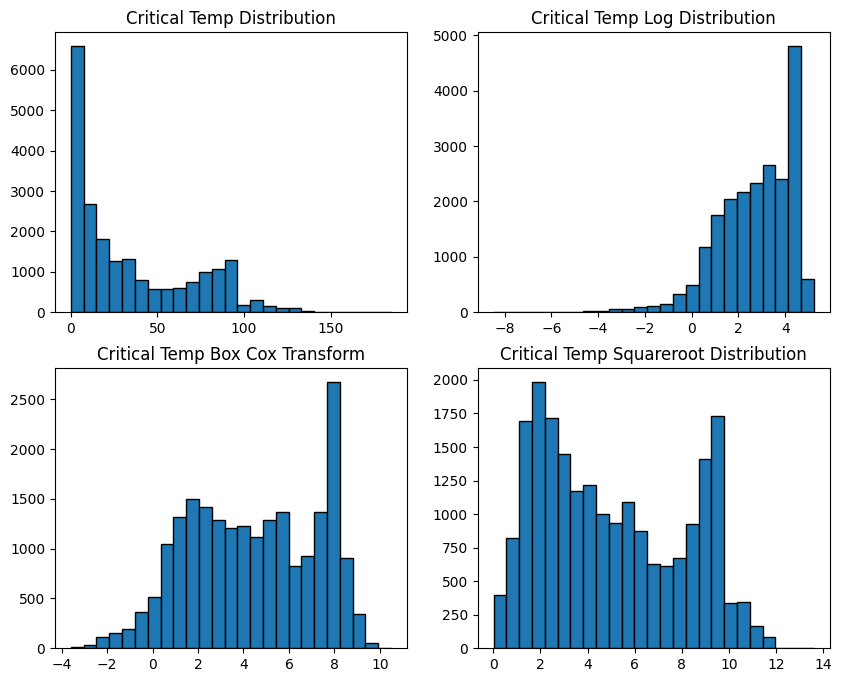

In [21]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

axes[0,0].hist(df['critical_temp'], bins = 25, edgecolor='black')
axes[0,0].set_title('Critical Temp Distribution')

axes[0,1].hist(np.log(df['critical_temp']), bins = 25, edgecolor='black')
axes[0,1].set_title('Critical Temp Log Distribution')

axes[1,1].hist(np.sqrt(df['critical_temp']), bins = 25, edgecolor='black')
axes[1,1].set_title('Critical Temp Squareroot Distribution')

axes[1,0].hist(df['critical_temp_transform'], bins = 25, edgecolor='black')
axes[1,0].set_title('Critical Temp Box Cox Transform')

plt.show()

# Correlation Info / Plots

## Scaling Data & Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['critical_temp_transform', 'critical_temp'], axis = 1)
y = df['critical_temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.2, random_state=12)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

## Correlations 

In [23]:
core_data = pd.concat([X_train_scaled, y_train], axis = 1)
correlation_data = core_data.corr()
correlation_target = correlation_data['critical_temp']

In [24]:
correlation_target.nsmallest(10)

Cs                      -0.076822
Tc                      -0.075295
std_atomic_radius       -0.071642
S                       -0.071229
Er                      -0.070134
Os                      -0.063045
F                       -0.060455
wtd_range_FusionHeat    -0.059163
wtd_std_atomic_radius   -0.058988
range_atomic_radius     -0.058825
Name: critical_temp, dtype: float64

In [25]:
correlation_target.nlargest(15)

critical_temp              1.000000
Pd                         0.090037
Sb                         0.072646
Ga                         0.058372
Be                         0.057971
Mg                         0.055814
Gd                         0.051689
Cd                         0.048384
Ce                         0.043995
Se                         0.043839
wtd_entropy_FusionHeat     0.040298
Sr                         0.038631
Al                         0.034591
Mo                         0.034585
wtd_range_atomic_radius    0.034153
Name: critical_temp, dtype: float64

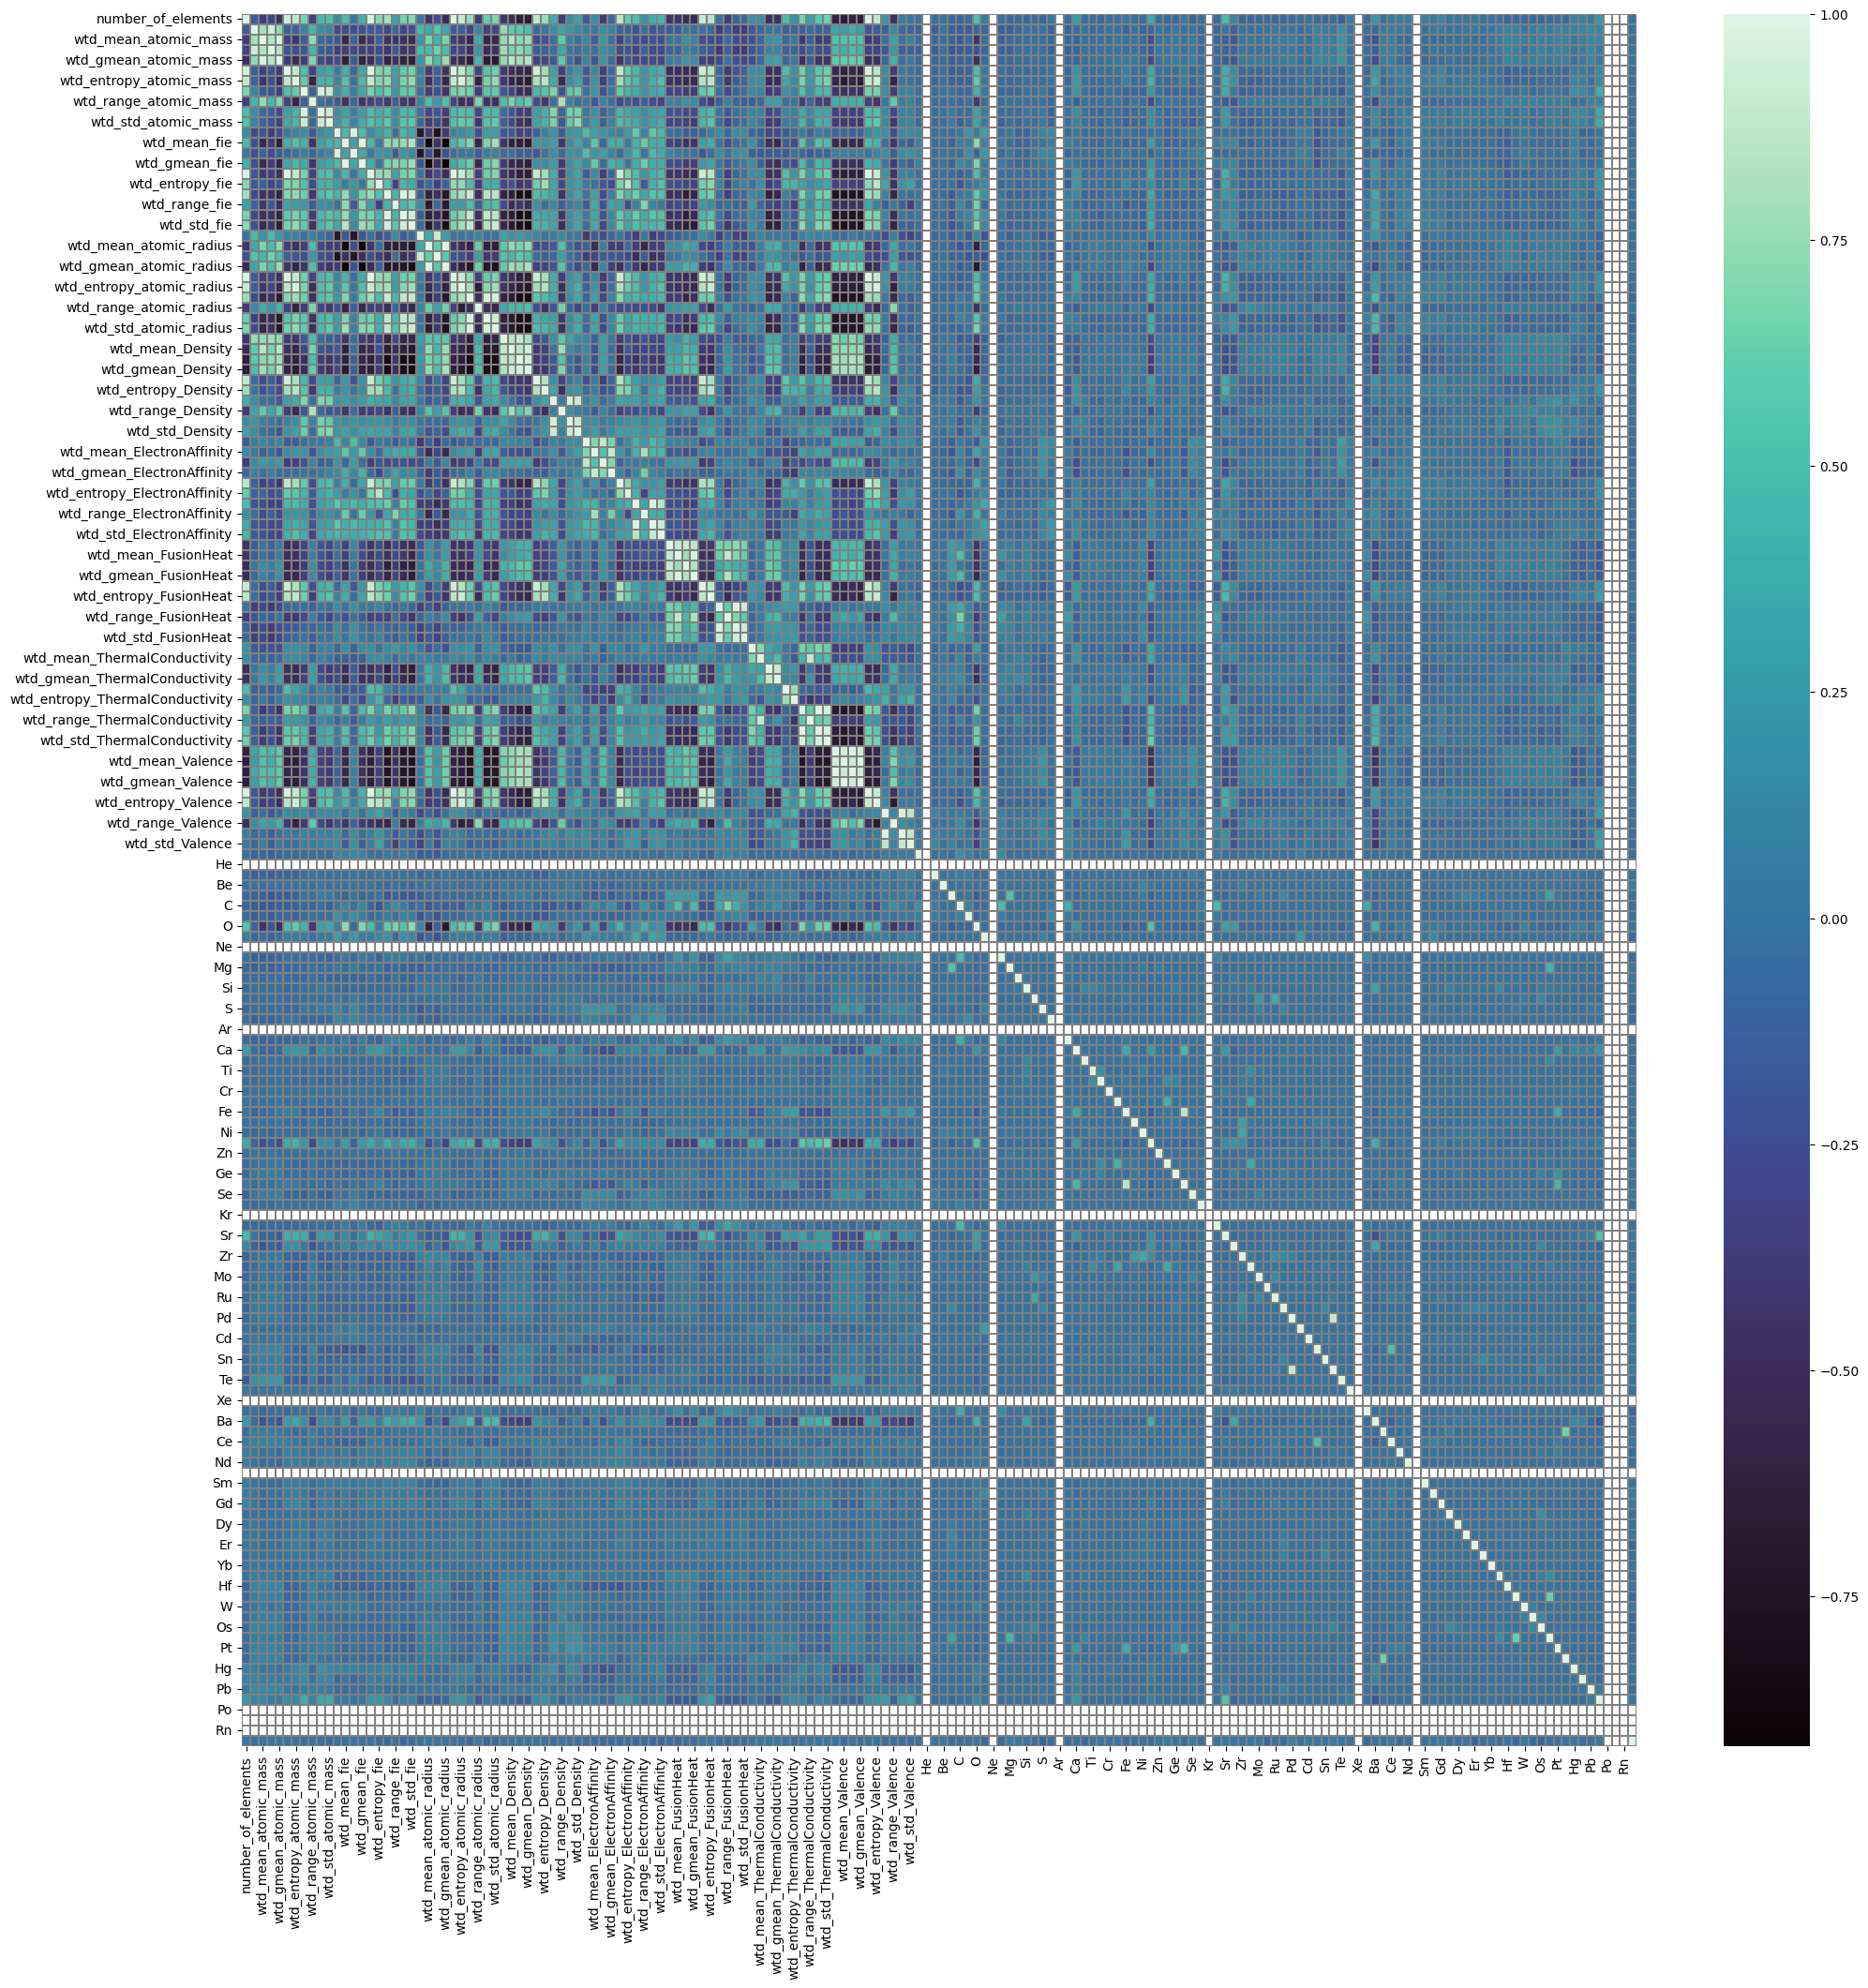

In [26]:
plt.figure(figsize=(24,24))
sns.heatmap(correlation_data,linecolor='grey', cmap = 'mako', linewidths=.01)
plt.show()

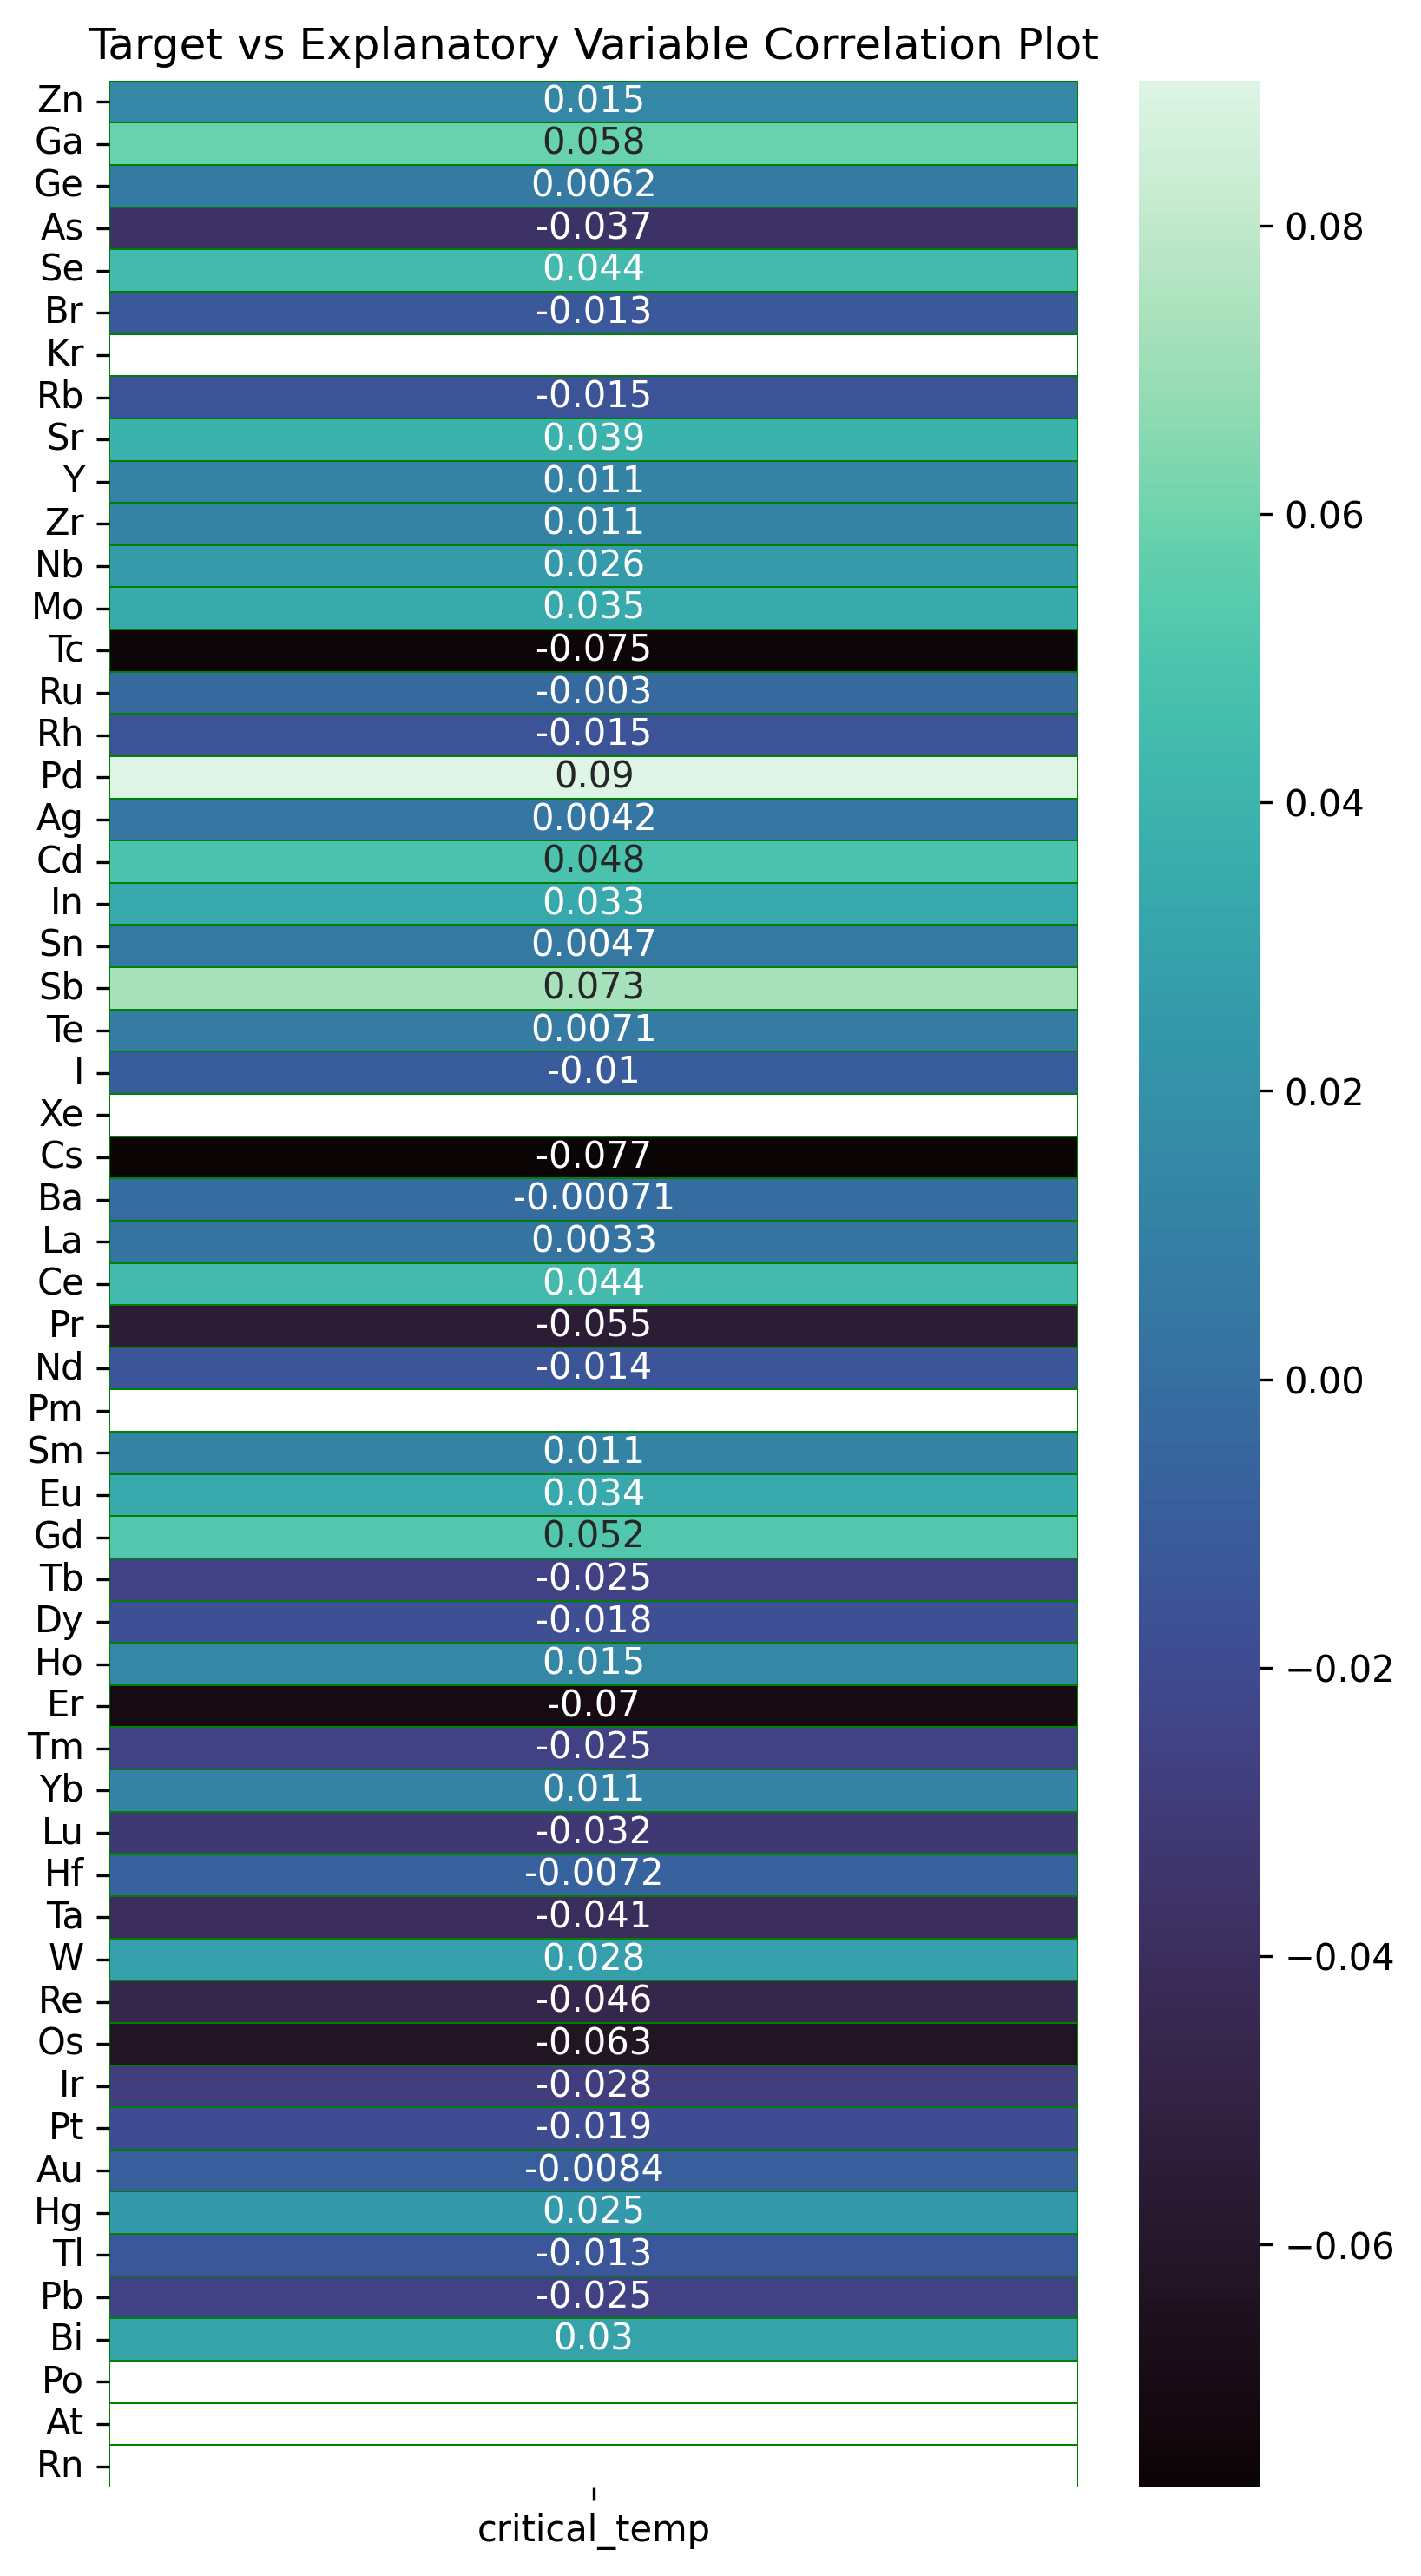

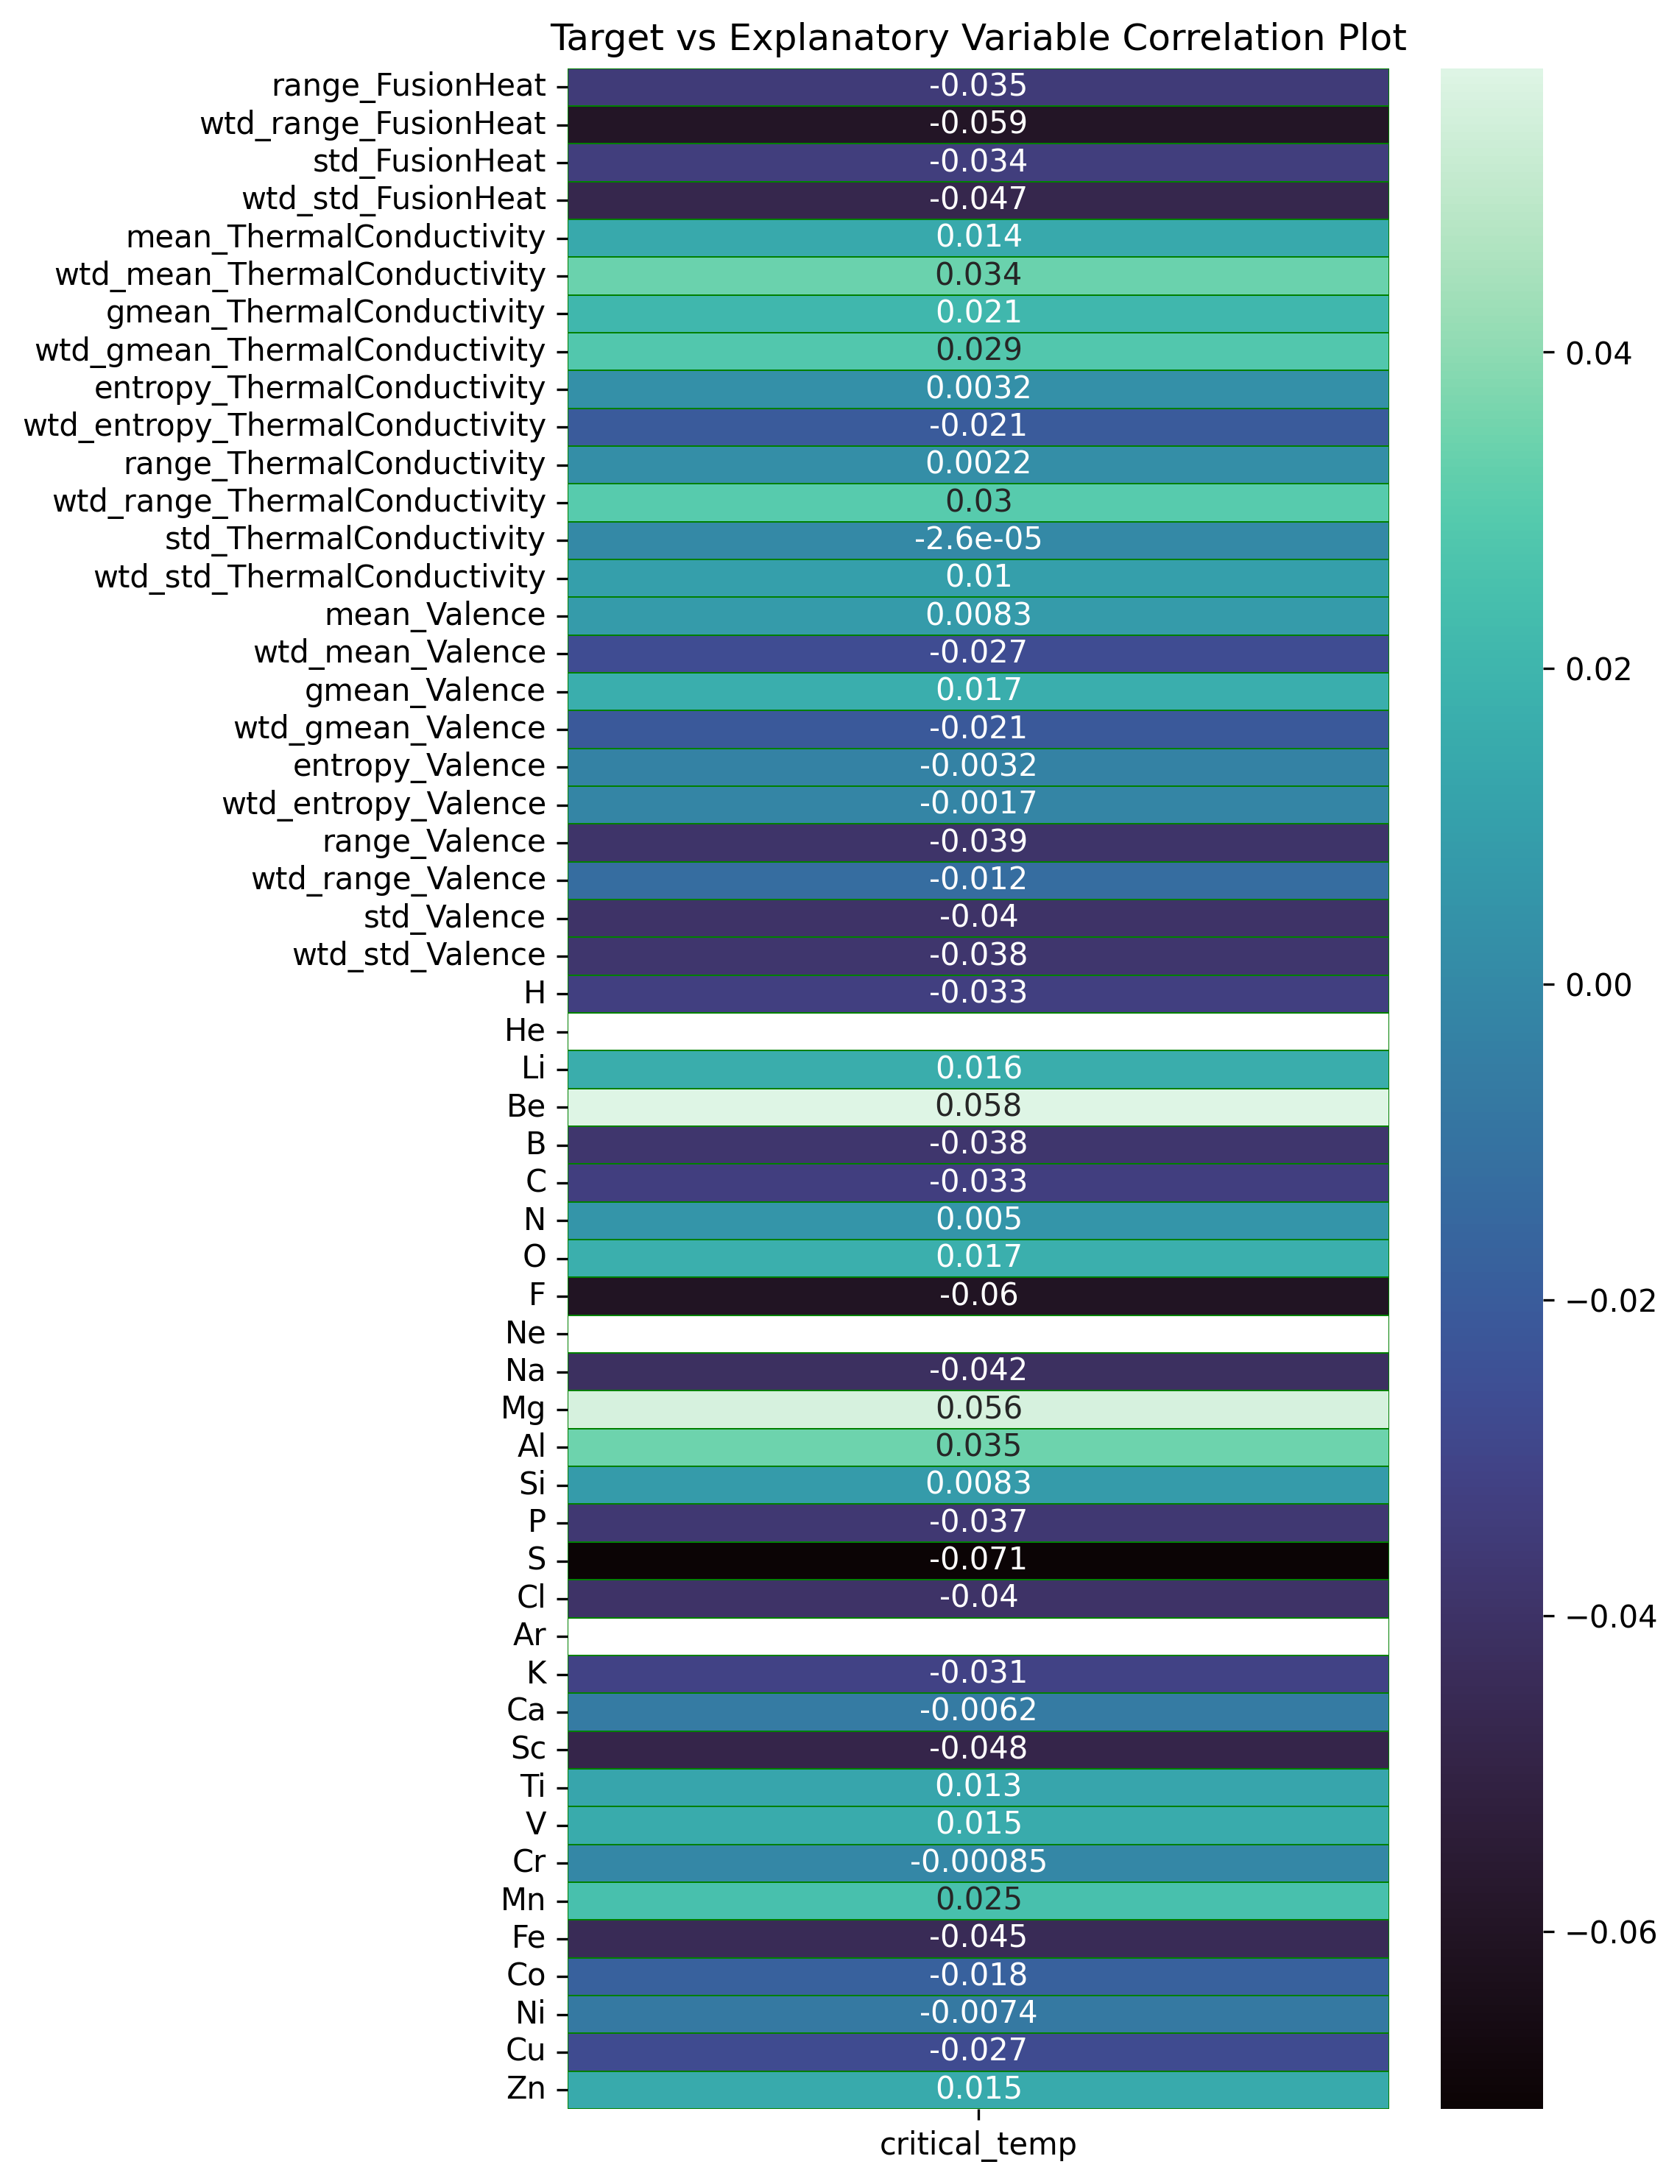

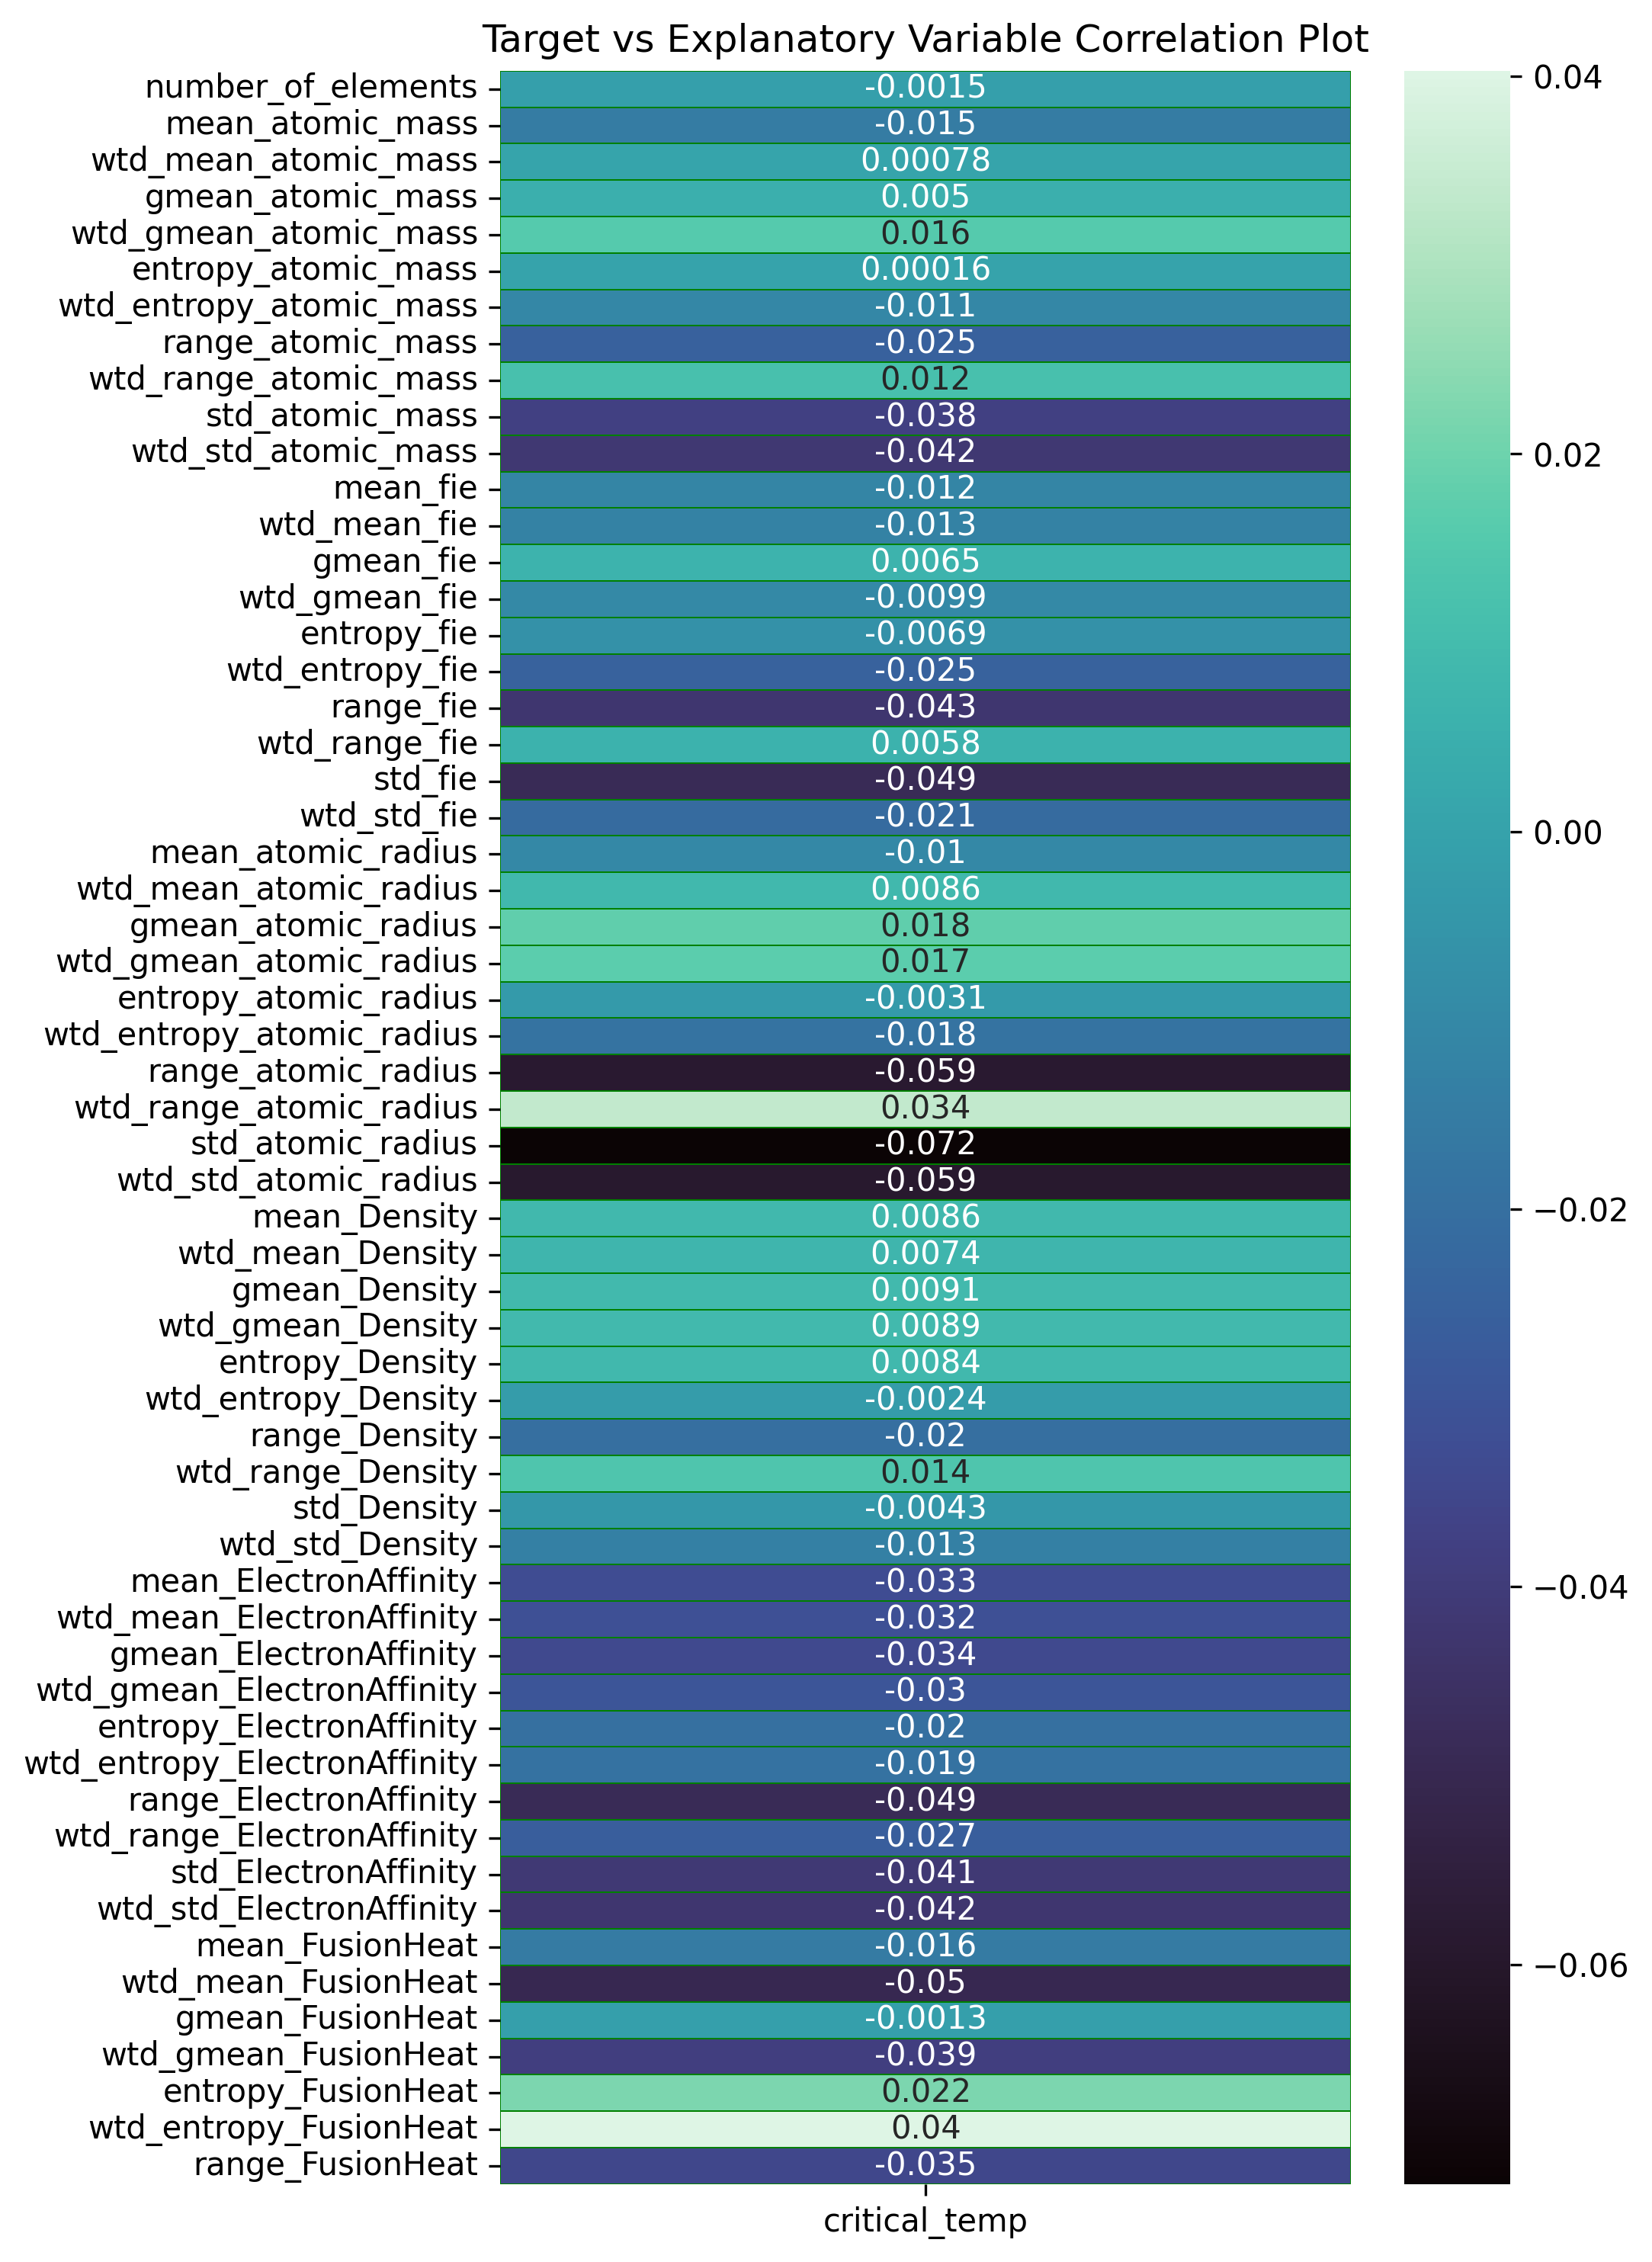

In [27]:
plt.figure(figsize=(6,12), dpi = 300)
sns.heatmap(correlation_data.iloc[110:167,167:168],
linecolor='green',
cmap = 'mako',
linewidths=.1,
annot= True)
plt.title('Target vs Explanatory Variable Correlation Plot')
plt.show()

plt.figure(figsize=(6,12), dpi = 300)
sns.heatmap(correlation_data.iloc[57:111,167:168],
linecolor='green',
cmap = 'mako',
linewidths=.1,
annot = True)
plt.title('Target vs Explanatory Variable Correlation Plot')
plt.show()

plt.figure(figsize=(6,12), dpi = 300)
sns.heatmap(correlation_data.iloc[0:58,167:168],
linecolor='green',
cmap = 'mako',
linewidths=.1,
annot = True)
plt.title('Target vs Explanatory Variable Correlation Plot')
plt.show()

<hr>

# Lasso

<hr>

## Lasso CV

In [28]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV, Lasso
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category = ConvergenceWarning)

# initializing LassoCV
lasso_model = LassoCV(alphas = np.logspace(-2,2,11), cv=5)
lasso_model.fit(X_train_scaled, y_train)

# best alpha 
best_alpha = lasso_model.alpha_
print('Best alpha: ', best_alpha)

# Initializing Lasso with best alpha
lasso_best_alpha = Lasso(alpha = best_alpha)

# perfoming cross_val_ with scoring metric
scores = cross_val_score(lasso_best_alpha, X_train_scaled, y_train, cv=5, scoring = 'neg_mean_squared_error')
rmse_scores = (-scores)**.5

print('Cross-Validation RMSE Scores: ', rmse_scores)
print('Average RMSE: ', rmse_scores.mean())

# cross val predictions
cv_predictions = cross_val_predict(lasso_best_alpha, X_train_scaled, y_train, cv = 5)
cv_lasso_rmse = mean_squared_error(y_train, cv_predictions, squared = False)
print('Cross-Validation RMSE using cross_val_predict', cv_lasso_rmse)

Best alpha:  0.01
Cross-Validation RMSE Scores:  [17.05565836 18.14421384 18.75547573 16.2031406  17.80876668]
Average RMSE:  17.59345104349322
Cross-Validation RMSE using cross_val_predict 17.615726908951025


## Residual vs. Fitted 

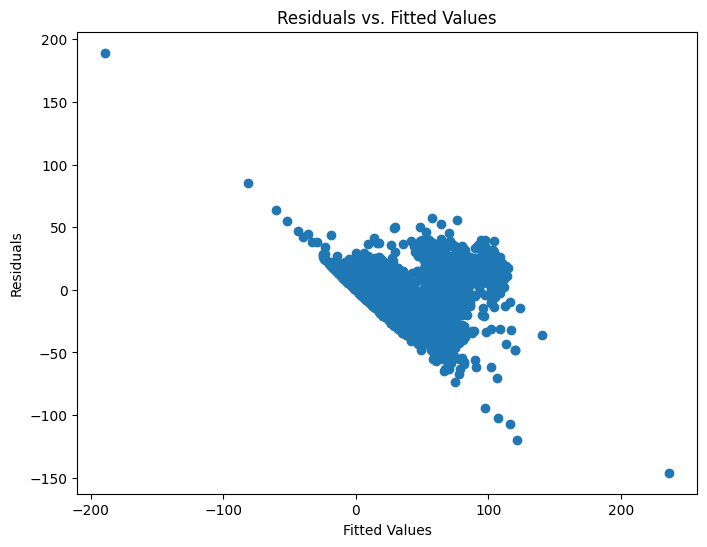

In [29]:
# 1. Residuals vs Fitted Values Plot
plt.figure(figsize=(8, 6))
plt.scatter(cv_predictions, y_train - cv_predictions)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

## Q-Q Plot

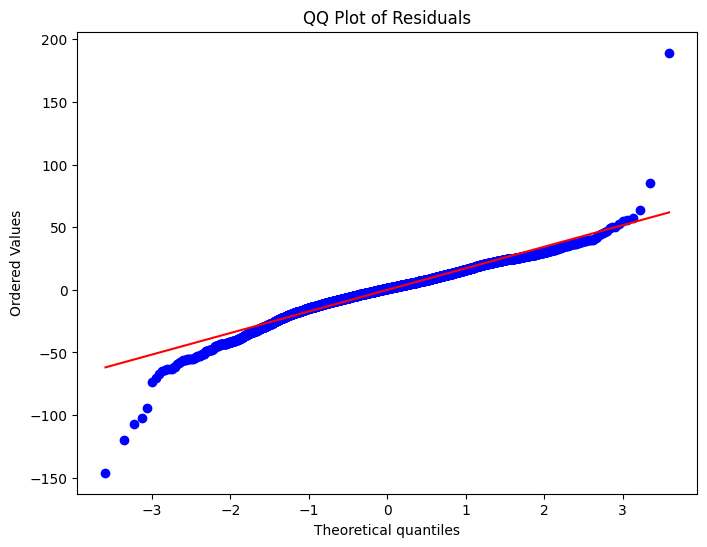

In [30]:
import scipy.stats as stats
# 2. QQ Plot
plt.figure(figsize=(8, 6))
stats.probplot(y_train - cv_predictions, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()

## Feature Importance

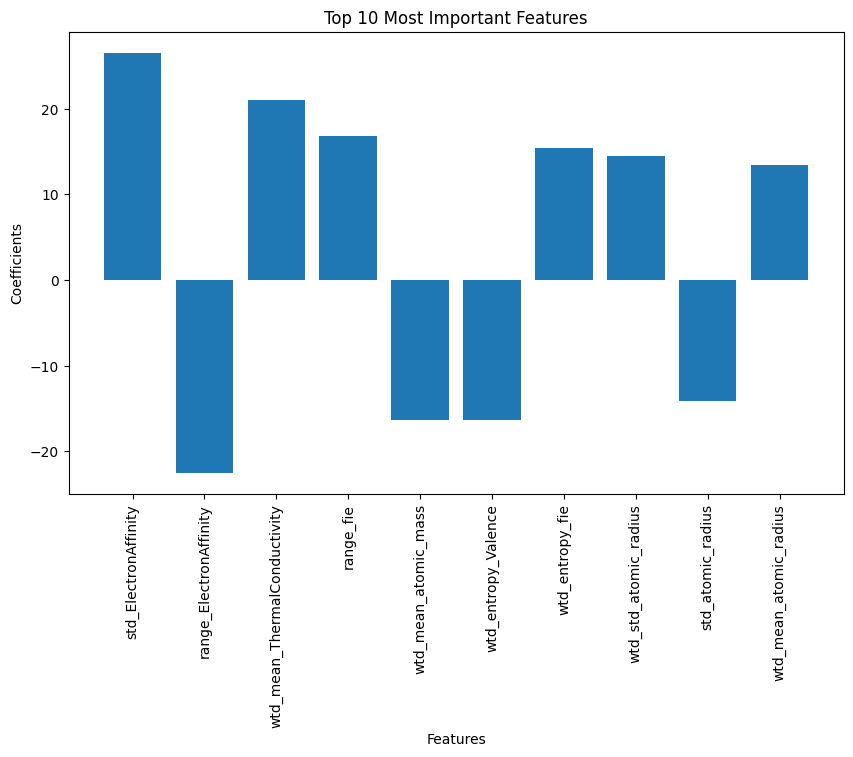

In [31]:
# Fit Lasso model with the best alpha
lasso_best_alpha.fit(X_train_scaled, y_train)

# Get non-zero coefficients and corresponding feature names
non_zero_coefficients = lasso_best_alpha.coef_[lasso_best_alpha.coef_ != 0]
non_zero_features = np.array(X_train_scaled.columns)[lasso_best_alpha.coef_ != 0]

# Sort the coefficients by their absolute values, but keep only the top 10
sorted_indices = np.argsort(np.abs(non_zero_coefficients))[::-1][:10]
top_10_coefficients = non_zero_coefficients[sorted_indices]
top_10_features = non_zero_features[sorted_indices]

# Plot feature importance for the top 10 features
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_10_features)), top_10_coefficients)
plt.xticks(range(len(top_10_features)), top_10_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Top 10 Most Important Features')
plt.show()


## Hold out Set predictions

In [32]:
# fit best alpha model
lasso_best_alpha.fit(X_train_scaled, y_train)

y_pred_test = lasso_best_alpha.predict(X_test_scaled)
holdout_rmse_lasso = mean_squared_error(y_test, y_pred_test, squared = False)
print('Hold-out RMSE: ', holdout_rmse_lasso)

Hold-out RMSE:  23.508161878655947


<hr>

# Ridge

<hr>

## Cross Val Model

In [33]:
from sklearn.linear_model import RidgeCV, Ridge

ridge_model = RidgeCV(alphas = np.logspace(-2,2,11), cv = 5)
ridge_model.fit(X_train_scaled, y_train)

best_alpha = ridge_model.alpha_
print('Best alpha: ', best_alpha)

ridge_best_alpha = Ridge(alpha = best_alpha)

scores = cross_val_score(ridge_best_alpha, X_train_scaled, y_train, cv =5, scoring = 'neg_mean_squared_error')
rmse_scores = (-scores)**.5

print('Cross-Validation RMSE Scores: ', rmse_scores)
print('Average RMSE: ', rmse_scores.mean())

cv_predictions = cross_val_predict(ridge_best_alpha, X_train_scaled, y_train, cv=5)
cv_ridge_rmse = mean_squared_error(y_train, cv_predictions, squared = False)
print('Cross - Validation RMSE using Cross Val Pred', cv_ridge_rmse)


Best alpha:  0.01
Cross-Validation RMSE Scores:  [16.93111055 17.75577535 18.70122445 16.1260031  17.88780085]
Average RMSE:  17.480382861573222
Cross - Validation RMSE using Cross Val Pred 17.50242622687606


## Pred vs Acutal

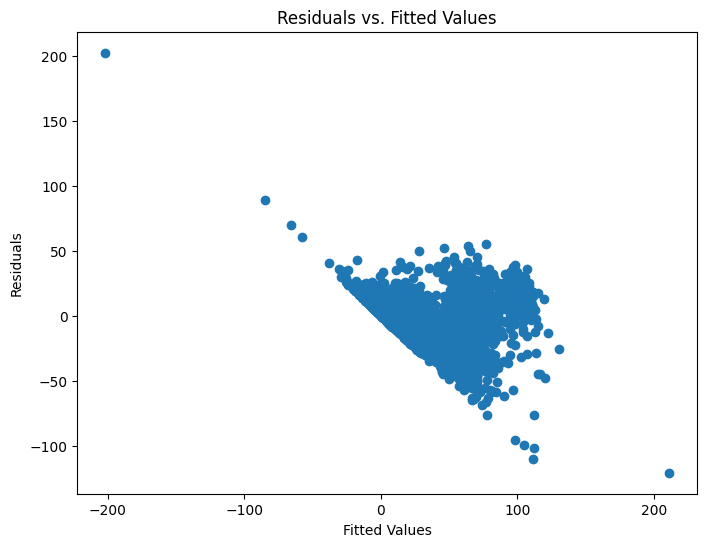

In [34]:
# 1. Residuals vs Fitted Values Plot
plt.figure(figsize=(8, 6))
plt.scatter(cv_predictions, y_train - cv_predictions)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

## Q-Q Plot

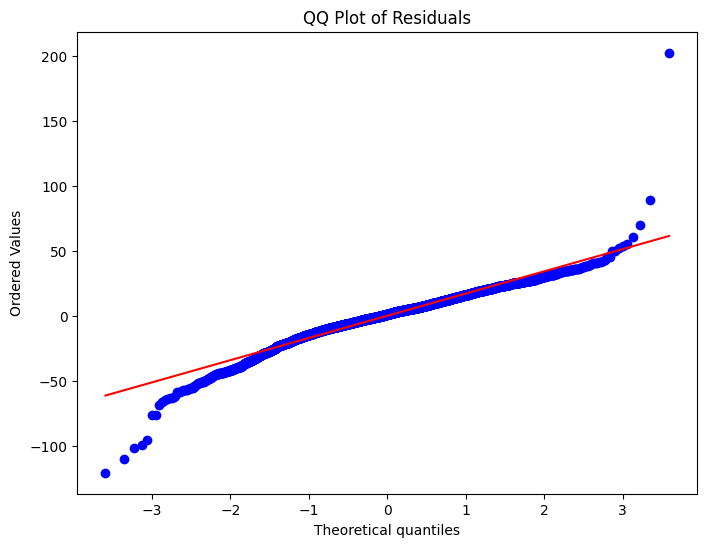

In [35]:
# 2. QQ Plot
plt.figure(figsize=(8, 6))
stats.probplot(y_train - cv_predictions, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()

## Feature Importance

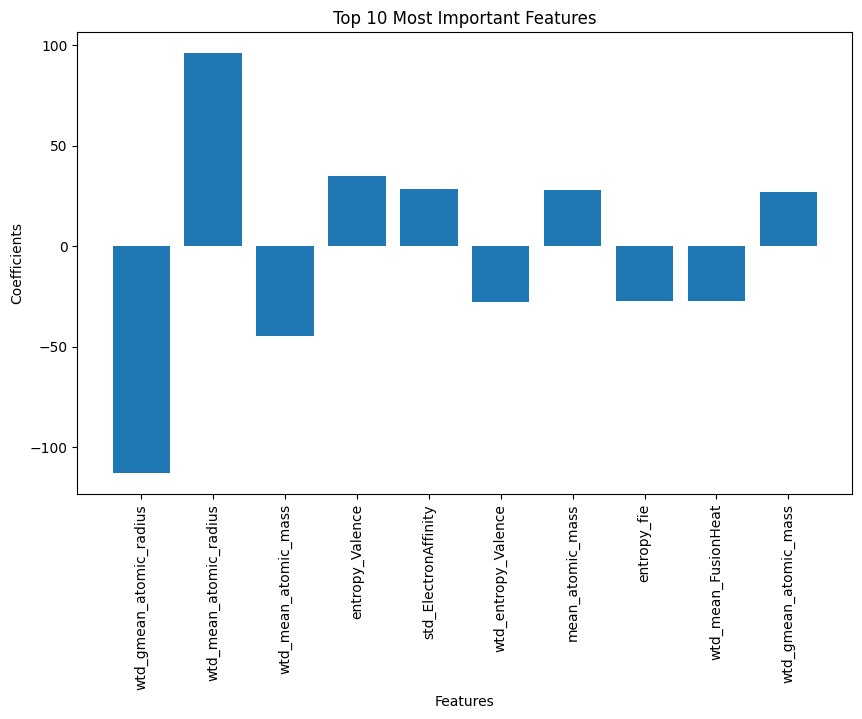

In [36]:
# 3. Top 10 Feature Importance
ridge_best_alpha.fit(X_train_scaled, y_train)  # Fitting the model to get coefficients
coefficients = ridge_best_alpha.coef_

# Sort the coefficients by their absolute values, but keep only the top 10
sorted_indices = np.argsort(np.abs(coefficients))[::-1][:10]
top_10_coefficients = coefficients[sorted_indices]
top_10_features = np.array(X_train_scaled.columns)[sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_10_features)), top_10_coefficients)
plt.xticks(range(len(top_10_features)), top_10_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Top 10 Most Important Features')
plt.show()

## Holdout Set Predictions

In [37]:
ridge_best_alpha.fit(X_train_scaled, y_train)
y_pred_test = ridge_best_alpha.predict(X_test_scaled)
holdout_rmse_ridge = mean_squared_error(y_test, y_pred_test, squared = False)
print('Holdout RMSE: ', holdout_rmse_ridge)


Holdout RMSE:  24.77233804560577


# Scale & Split Data with "Critical Temp Transformed

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['critical_temp_transform', 'critical_temp'], axis = 1)
y = df['critical_temp_transform']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.2, random_state=12)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

## Correlation on Transformed Variable

In [39]:
core_data = pd.concat([X_train_scaled, y_train], axis = 1)
correlation_data = core_data.corr()
correlation_target = correlation_data['critical_temp_transform']

In [40]:
correlation_target.nsmallest(10)

Er                     -0.113125
Tc                     -0.085807
B                      -0.080060
Cs                     -0.077309
S                      -0.076124
wtd_mean_FusionHeat    -0.068332
wtd_std_FusionHeat     -0.066808
wtd_range_FusionHeat   -0.065182
Ir                     -0.057623
Pr                     -0.056456
Name: critical_temp_transform, dtype: float64

In [41]:
correlation_target.nlargest(15)

critical_temp_transform          1.000000
Pd                               0.064658
Ga                               0.050046
Sb                               0.049051
wtd_range_ThermalConductivity    0.046485
Mg                               0.045164
Be                               0.043494
Se                               0.042501
wtd_mean_ThermalConductivity     0.042428
Gd                               0.041537
Cd                               0.038081
Sr                               0.037658
Al                               0.036825
wtd_entropy_FusionHeat           0.036581
wtd_range_atomic_radius          0.036178
Name: critical_temp_transform, dtype: float64

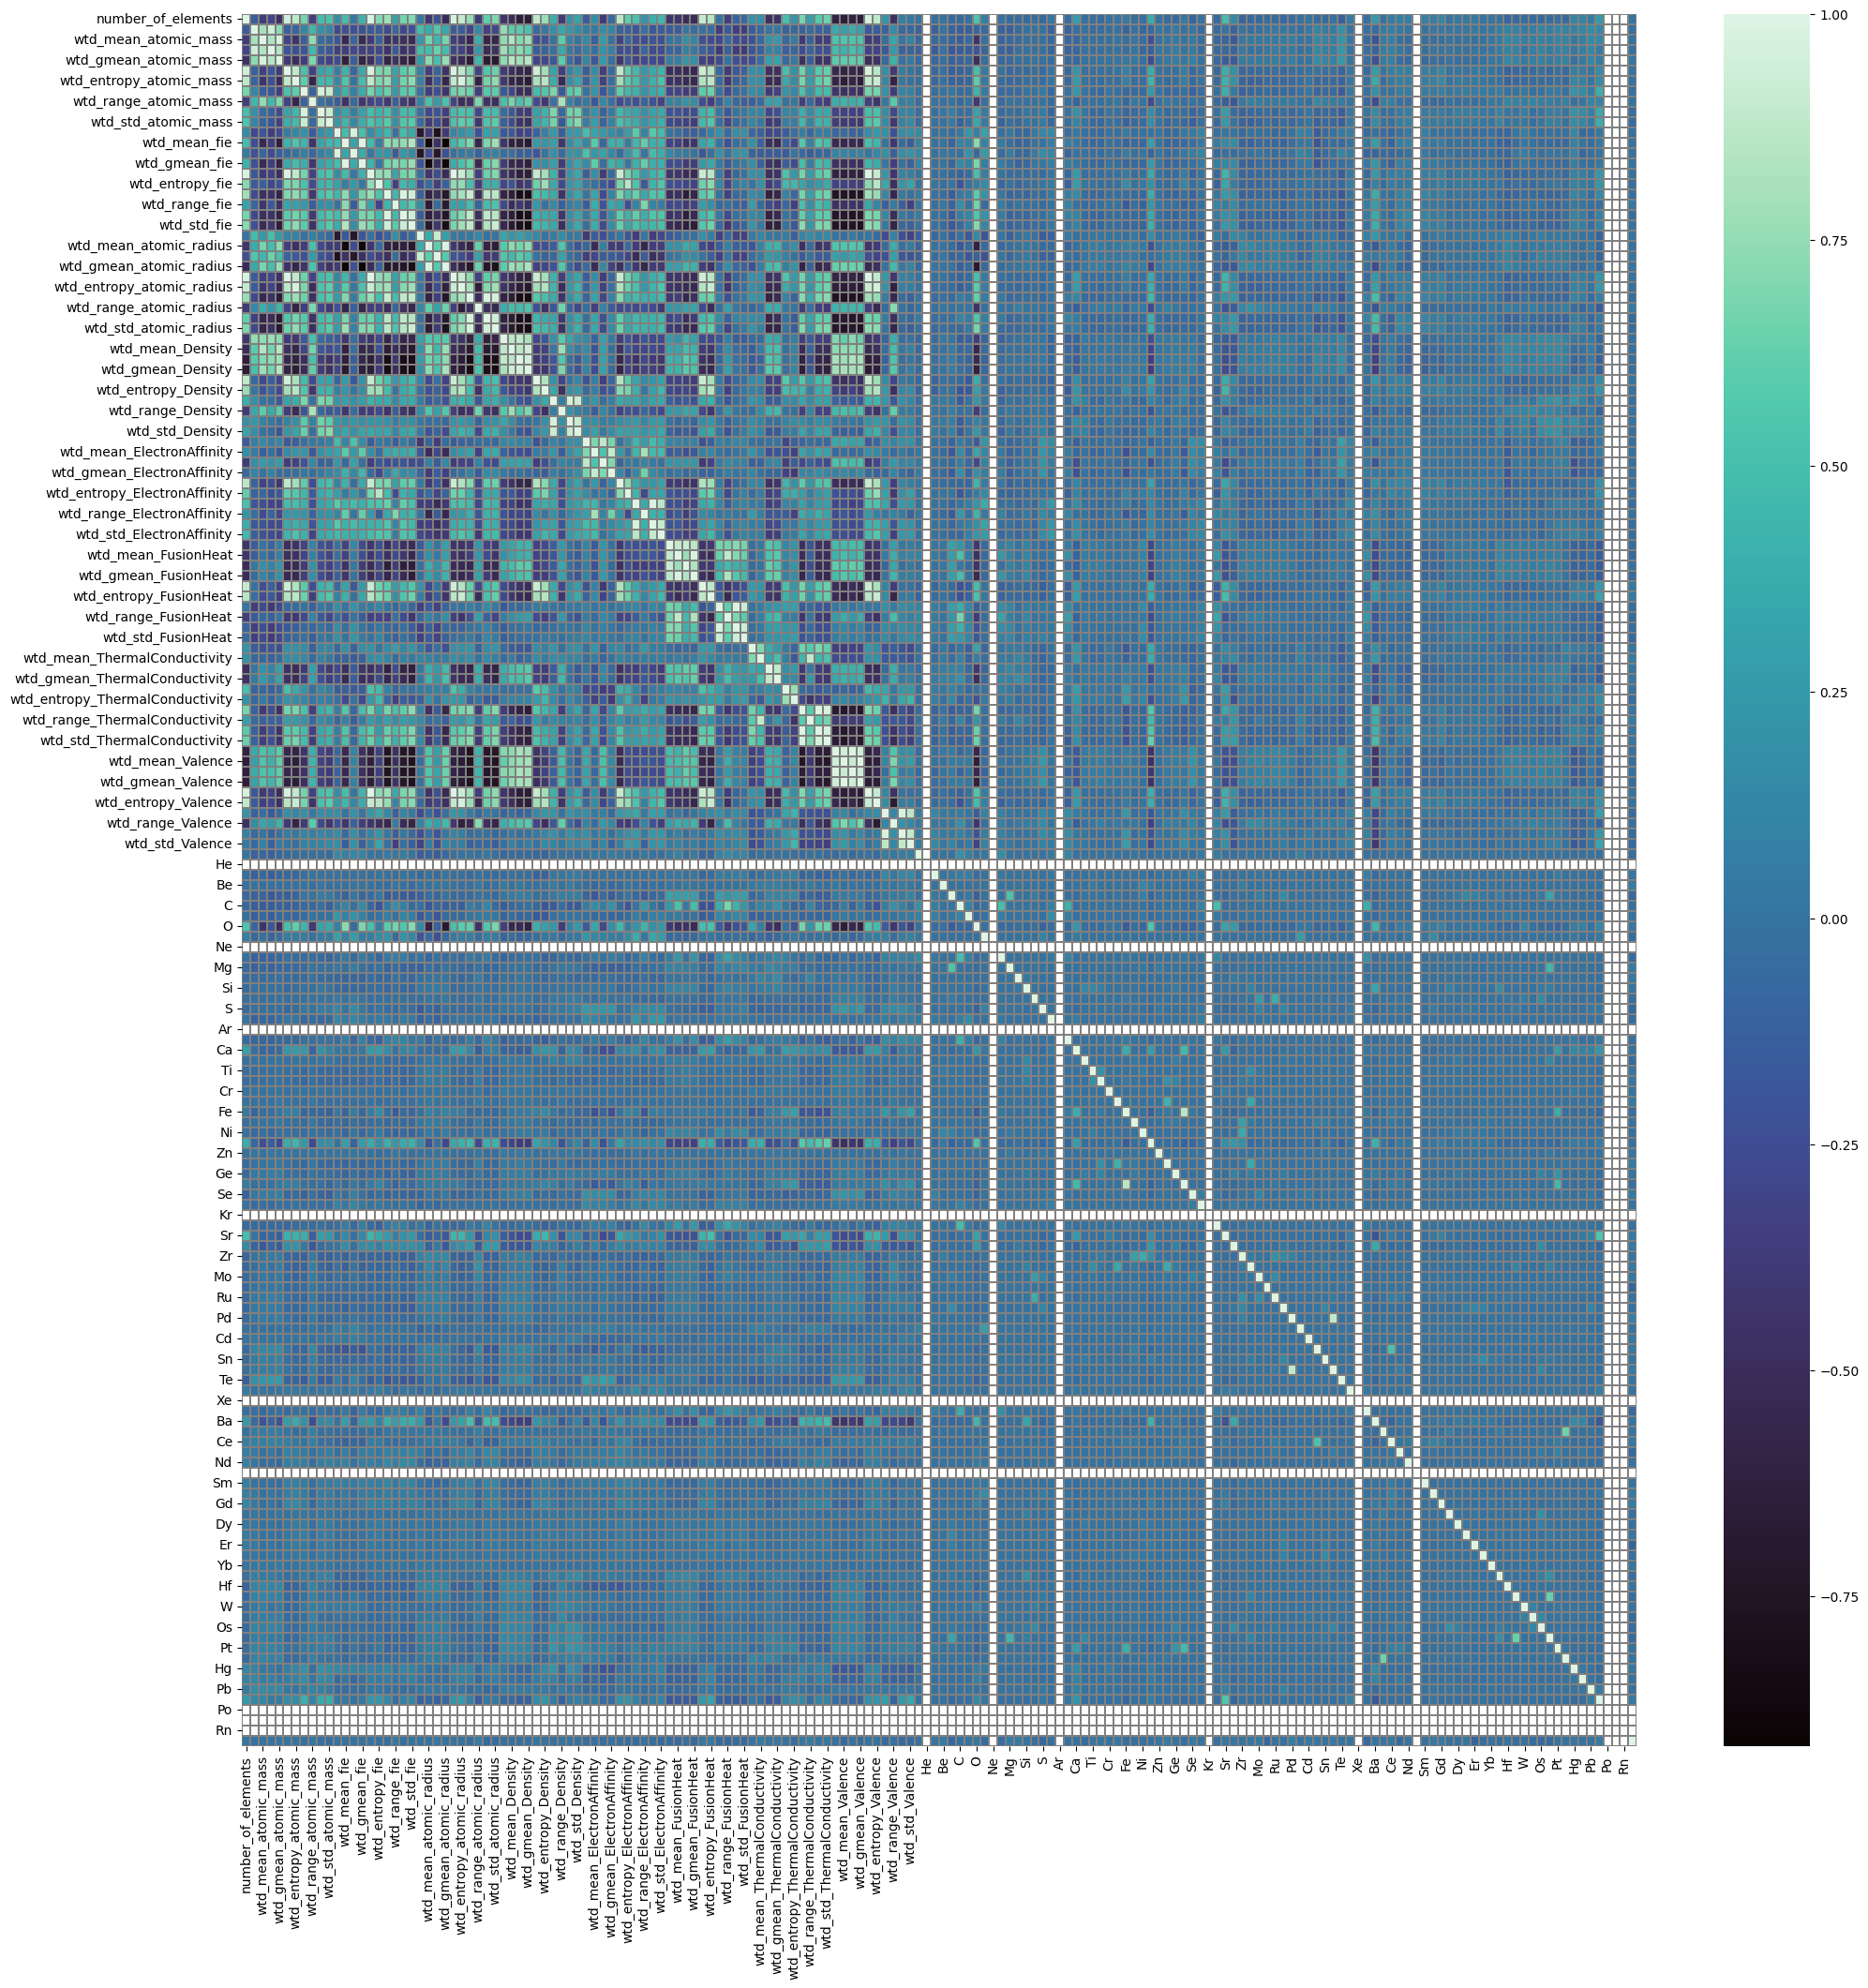

In [42]:
plt.figure(figsize=(24,24))
sns.heatmap(correlation_data,linecolor='grey', cmap = 'mako', linewidths=.01)
plt.show()

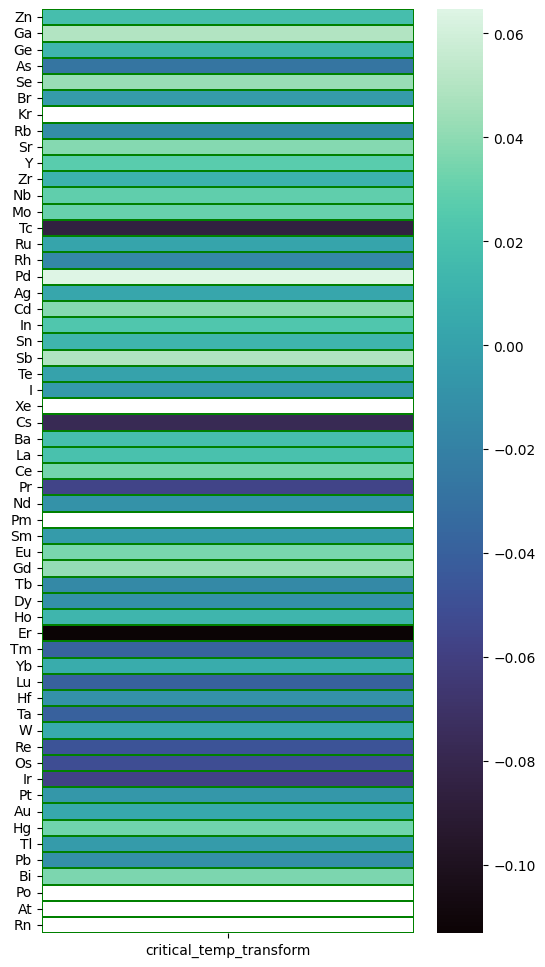

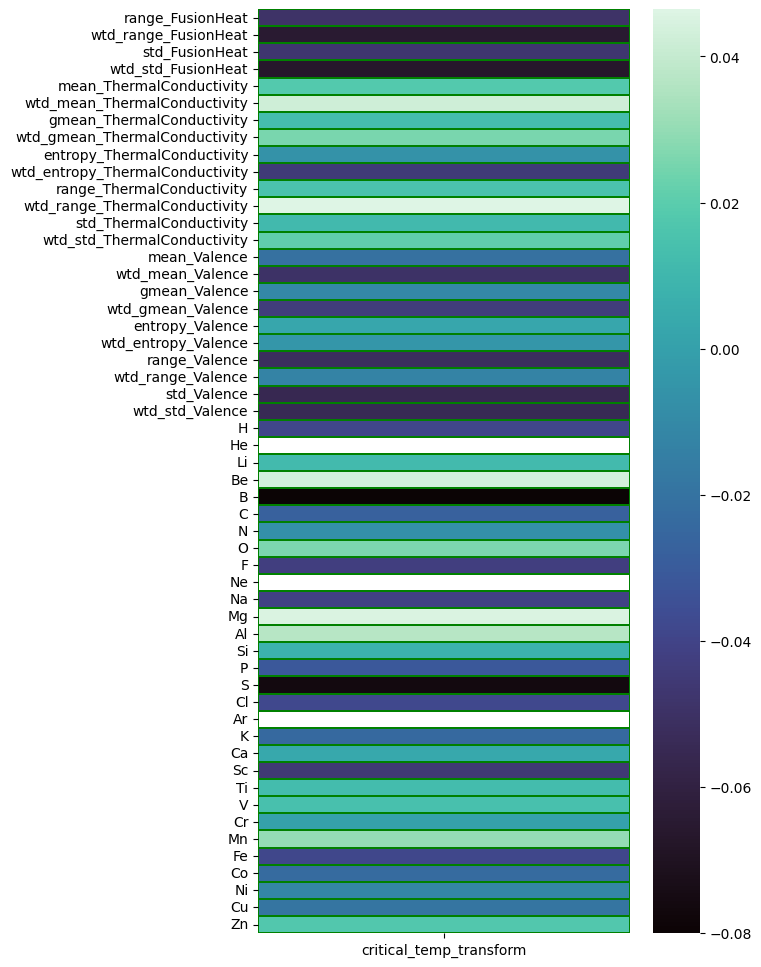

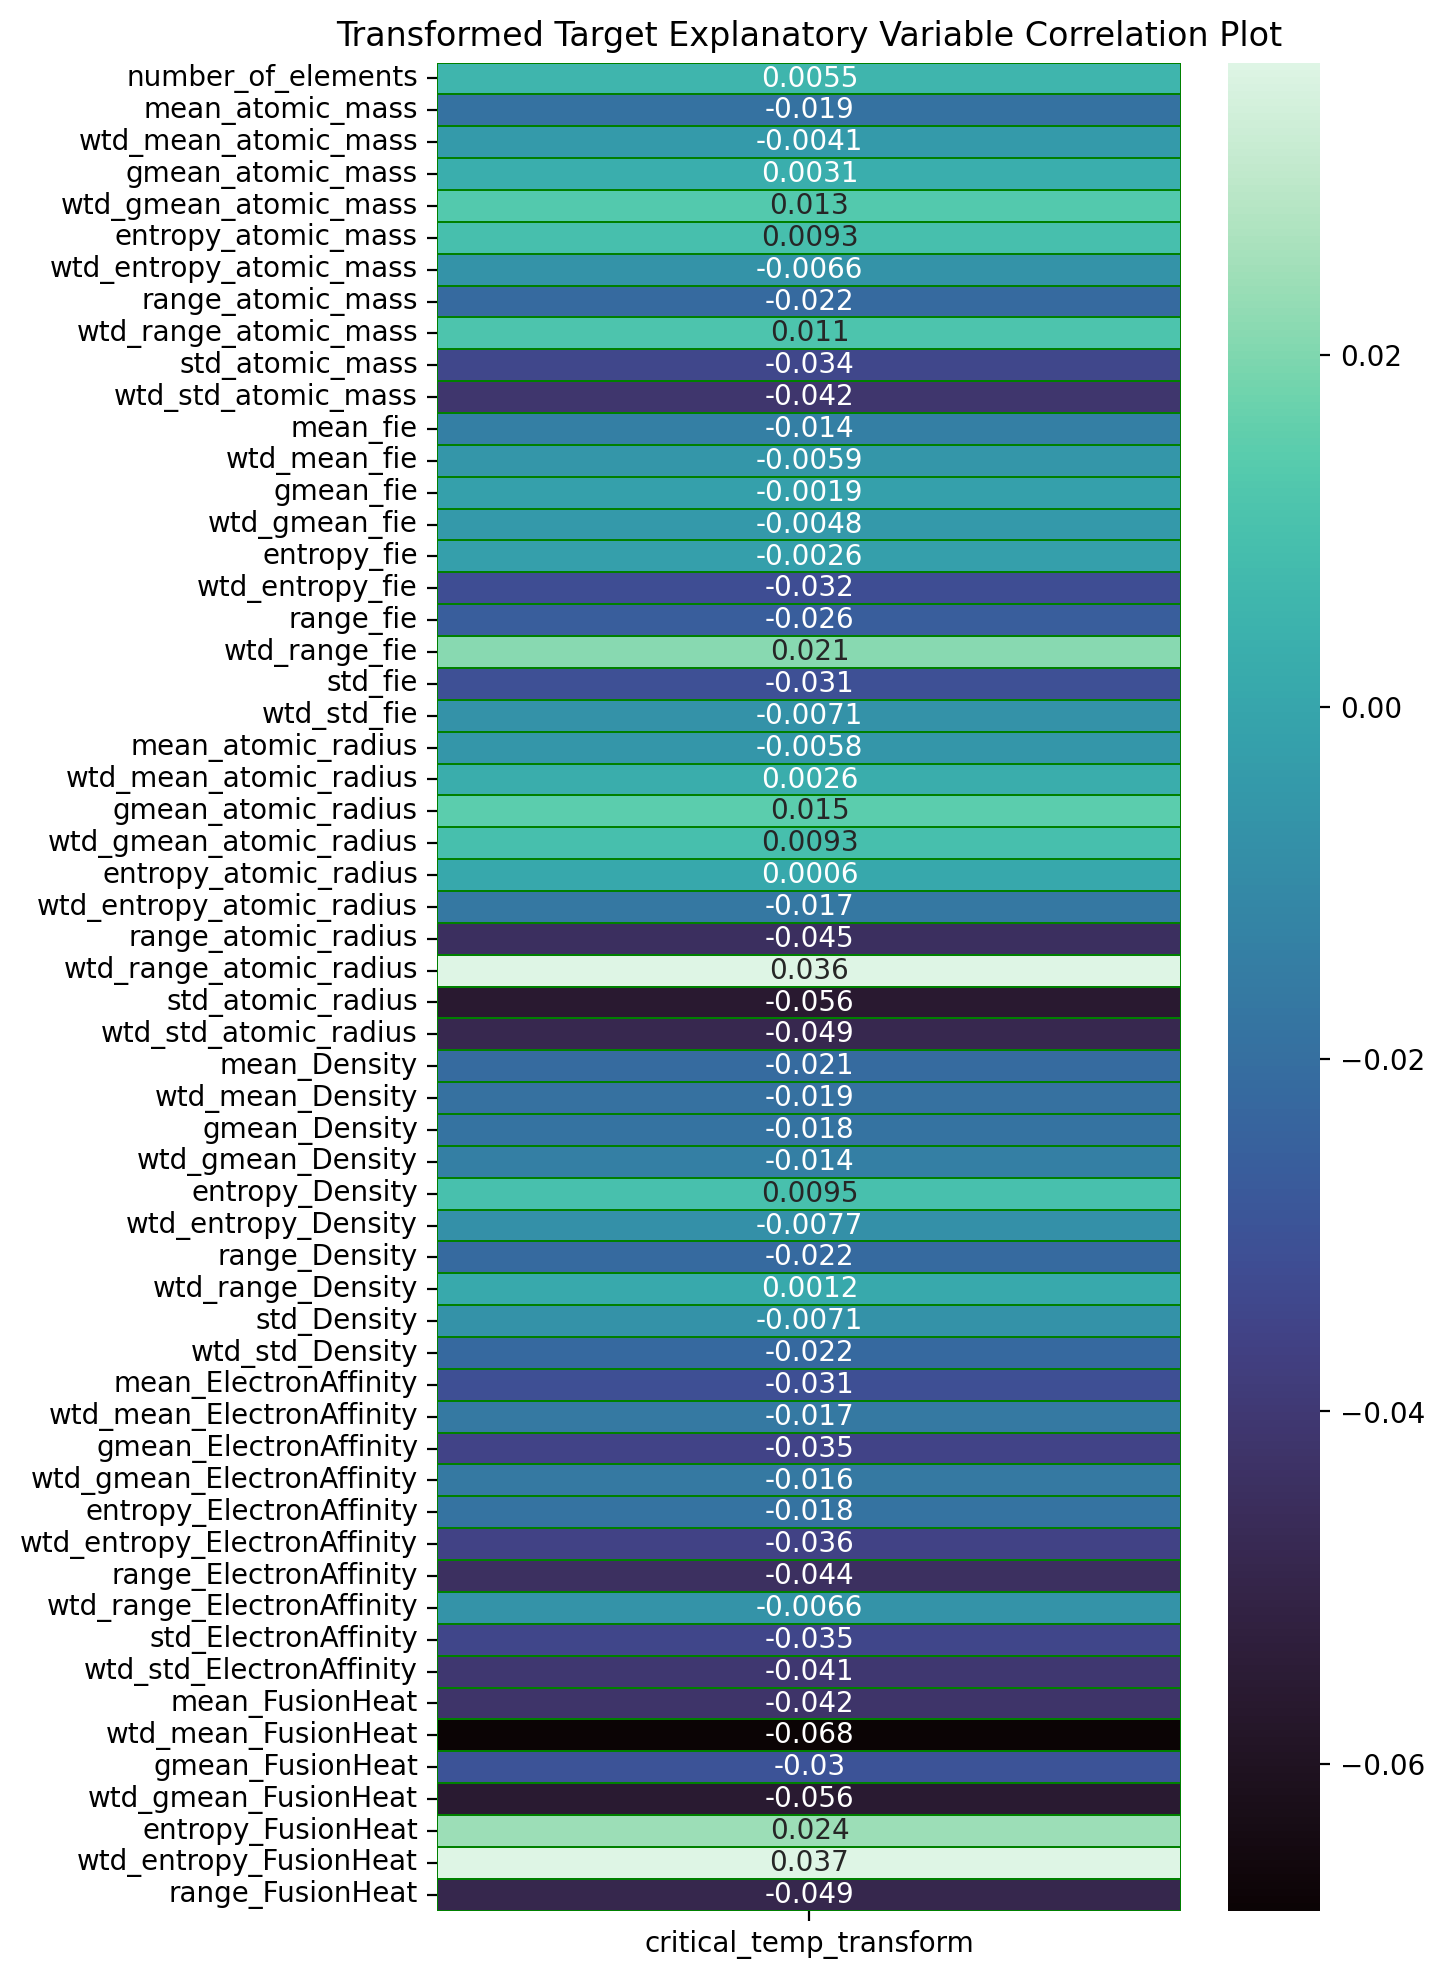

In [43]:
plt.figure(figsize=(6,12))
sns.heatmap(correlation_data.iloc[110:167,167:168] ,linecolor='green', cmap = 'mako', linewidths=.1)
plt.show()

plt.figure(figsize=(6,12))
sns.heatmap(correlation_data.iloc[57:111,167:168] ,linecolor='green', cmap = 'mako', linewidths=.1)
plt.show()

plt.figure(figsize=(6,12), dpi=200)
sns.heatmap(correlation_data.iloc[0:58,167:168] ,linecolor='green', cmap = 'mako', linewidths=.1, annot=True)
plt.title('Transformed Target Explanatory Variable Correlation Plot')
plt.show()

<hr>

# Linear Regression With Elastic Net Feature Selection

<hr>

In [44]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import ElasticNet, ElasticNetCV
import numpy as np

# Create the ElasticNetCV model for hyperparameter tuning
elastic_net_cv = ElasticNetCV(alphas=np.logspace(-3, 3, 50), l1_ratio=np.linspace(0.01, 1, 50), cv=5, random_state=12)

# Fit the ElasticNetCV model
elastic_net_cv.fit(X_train_scaled, y_train)

# Get the best alpha and l1_ratio from ElasticNetCV
best_alpha = elastic_net_cv.alpha_
best_ratio = elastic_net_cv.l1_ratio_

# Create the ElasticNet model with the best hyperparameters
elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_ratio)

# Calculate cross-validated scores
cv_scores = cross_val_score(elastic_net, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate cross-validated predictions
cv_predictions = cross_val_predict(elastic_net, X_train_scaled, y_train, cv=5)

# Convert negative MSE scores to positive RMSE scores
rmse_scores = np.sqrt(-cv_scores)

# Print the RMSE scores for each fold
for fold_idx, rmse in enumerate(rmse_scores):
    print(f"Fold {fold_idx + 1} RMSE: {rmse:.4f}")

Fold 1 RMSE: 1.3381
Fold 2 RMSE: 1.4104
Fold 3 RMSE: 1.3590
Fold 4 RMSE: 1.3471
Fold 5 RMSE: 1.3903


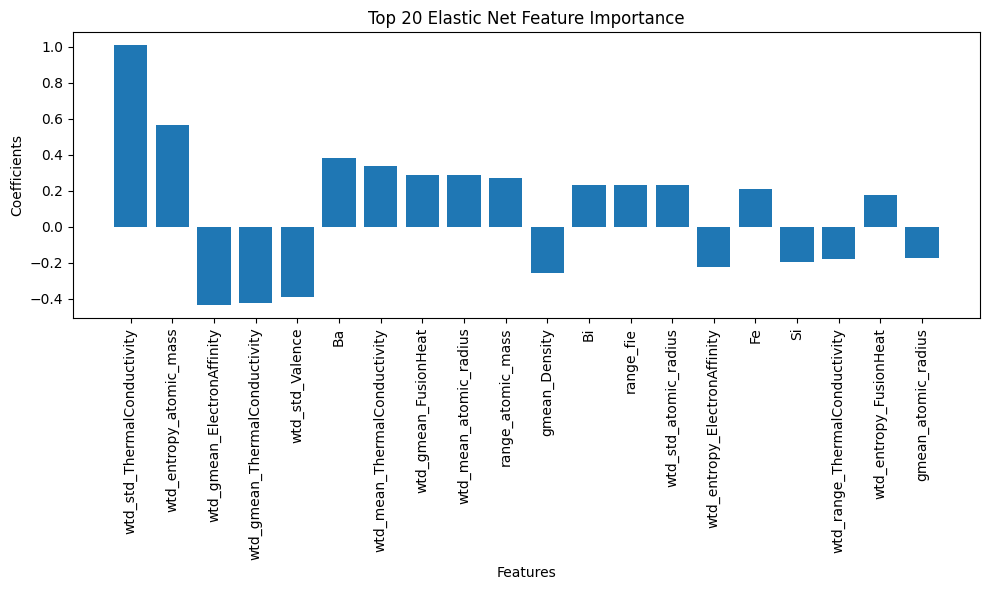

In [45]:
elastic_net.fit(X_train_scaled, y_train)

# Get the coefficients from the trained Elastic Net model
elastic_net_coefficients = elastic_net.coef_

# Get the corresponding feature names
feature_names = X_train.columns

# Sort the coefficients and feature names together based on absolute coefficient values
sorted_indices = abs(elastic_net_coefficients).argsort()[::-1]
top_indices = sorted_indices[:20]  # Select the top 20 feature indices
top_coefficients = elastic_net_coefficients[top_indices]
top_feature_names = feature_names[top_indices]

# Create a feature importance plot for the top 20 features
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_feature_names)), top_coefficients)
plt.xticks(range(len(top_feature_names)), top_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Top 20 Elastic Net Feature Importance')
plt.tight_layout()
plt.show()

In [46]:
selected_features = ["number_of_elements", "mean_atomic_mass", "wtd_mean_atomic_mass",
                    "gmean_atomic_mass", "wtd_entropy_atomic_mass", "range_atomic_mass",
                    "wtd_range_atomic_mass", "wtd_std_atomic_mass", "wtd_mean_fie",
                    "gmean_fie", "entropy_fie", "range_fie", "mean_atomic_radius",
                    "wtd_mean_atomic_radius", "gmean_atomic_radius", "wtd_entropy_atomic_radius",
                    "range_atomic_radius", "wtd_std_atomic_radius", "mean_Density",
                    "wtd_mean_Density", "gmean_Density", "wtd_entropy_Density",
                    "wtd_range_Density", "wtd_std_Density", "wtd_mean_ElectronAffinity",
                    "gmean_ElectronAffinity", "wtd_gmean_ElectronAffinity", "wtd_entropy_ElectronAffinity",
                    "wtd_range_ElectronAffinity", "std_ElectronAffinity", "wtd_std_ElectronAffinity",
                    "mean_FusionHeat", "wtd_mean_FusionHeat", "gmean_FusionHeat",
                    "wtd_gmean_FusionHeat", "entropy_FusionHeat", "wtd_entropy_FusionHeat",
                    "range_FusionHeat", "wtd_range_FusionHeat", "std_FusionHeat",
                    "wtd_std_FusionHeat", "mean_ThermalConductivity", "wtd_mean_ThermalConductivity",
                    "gmean_ThermalConductivity", "wtd_gmean_ThermalConductivity", "entropy_ThermalConductivity",
                    "wtd_entropy_ThermalConductivity", "range_ThermalConductivity", "wtd_range_ThermalConductivity",
                    "std_ThermalConductivity", "wtd_std_ThermalConductivity", "gmean_Valence",
                    "wtd_gmean_Valence", "entropy_Valence", "wtd_entropy_Valence",
                    "range_Valence", "wtd_range_Valence", "std_Valence",
                    "wtd_std_Valence", "H", "Li", "Be", "B", "C", "N", "O", "F",
                    "Na", "Mg","Si", "P", "S", "Cl", "K", "Ca", "Sc", "Ti",
                    "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn", "Ga", "Ge", "As",
                    "Se", "Br", "Rb", "Sr", "Zr", "Nb", "Mo", "Tc", "Rh", "Pd", "Ag",
                    "Cd", "In", "Sn", "Sb", "I", "Cs", "Ba", "La", "Ce", "Pr", "Nd",
                    "Sm", "Eu", "Gd", "Ho", "Er", "Tm", "Yb", "Lu", "Hf", "Ta", "W",
                    "Os", "Pt", "Au", "Hg", "Tl", "Pb", "Bi"
                    ]

## Linear Regression Model - Elastic Net

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy.special import inv_boxcox

X_train_selected = X_train_scaled[selected_features].reset_index(drop=True)
y_train_selected = y_train.reset_index(drop=True)

X_test_selected = X_test_scaled[selected_features].reset_index(drop=True)
y_test_selected = y_test.reset_index(drop=True)

# Add a constant term to the features
X_train_selected_with_const = sm.add_constant(X_train_selected)
X_test_selected_with_const = sm.add_constant(X_test_selected)

# Fit the OLS model
linear_model = sm.OLS(y_train_selected, X_train_selected_with_const).fit()

# Print the model summary
print(linear_model.summary())


                               OLS Regression Results                              
Dep. Variable:     critical_temp_transform   R-squared:                       0.798
Model:                                 OLS   Adj. R-squared:                  0.792
Method:                      Least Squares   F-statistic:                     127.6
Date:                     Wed, 30 Aug 2023   Prob (F-statistic):               0.00
Time:                             18:30:03   Log-Likelihood:                -7021.0
No. Observations:                     4252   AIC:                         1.430e+04
Df Residuals:                         4123   BIC:                         1.512e+04
Df Model:                              128                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

## Predictions - Elastic Net

In [48]:
# Making predictions on the training set
y_train_pred_transformed = linear_model.predict(X_train_selected_with_const)
# Making predictions on the test set
y_test_pred_transformed = linear_model.predict(X_test_selected_with_const)

# Make predictions positive (won't work with negative predictions)
# there isn't alot so we proceeded and used very very small number
y_train_pred_transformed[y_train_pred_transformed <= 0] = 1e-9
y_test_pred_transformed[y_test_pred_transformed <= 0] = 1e-9

# Inverse transform the predictions
y_train_pred_original = inv_boxcox(y_train_pred_transformed, lambda_value)
y_test_pred_original = inv_boxcox(y_test_pred_transformed, lambda_value)

# Inverse transform y 
y_train_original = inv_boxcox(y_train_selected, lambda_value)
y_test_original = inv_boxcox(y_test_selected, lambda_value)

# Compute RMSE
train_rmse_original = np.sqrt(mean_squared_error(y_train_original, y_train_pred_original))
test_rmse_original = np.sqrt(mean_squared_error(y_test_original, y_test_pred_original))

print(f'Training RMSE (original scale): {train_rmse_original:.4f}')
print(f'Test RMSE (original scale): {test_rmse_original:.4f}')

Training RMSE (original scale): 16.8308
Test RMSE (original scale): 17.6238


## Model Assumptions Plot - Elastic Net

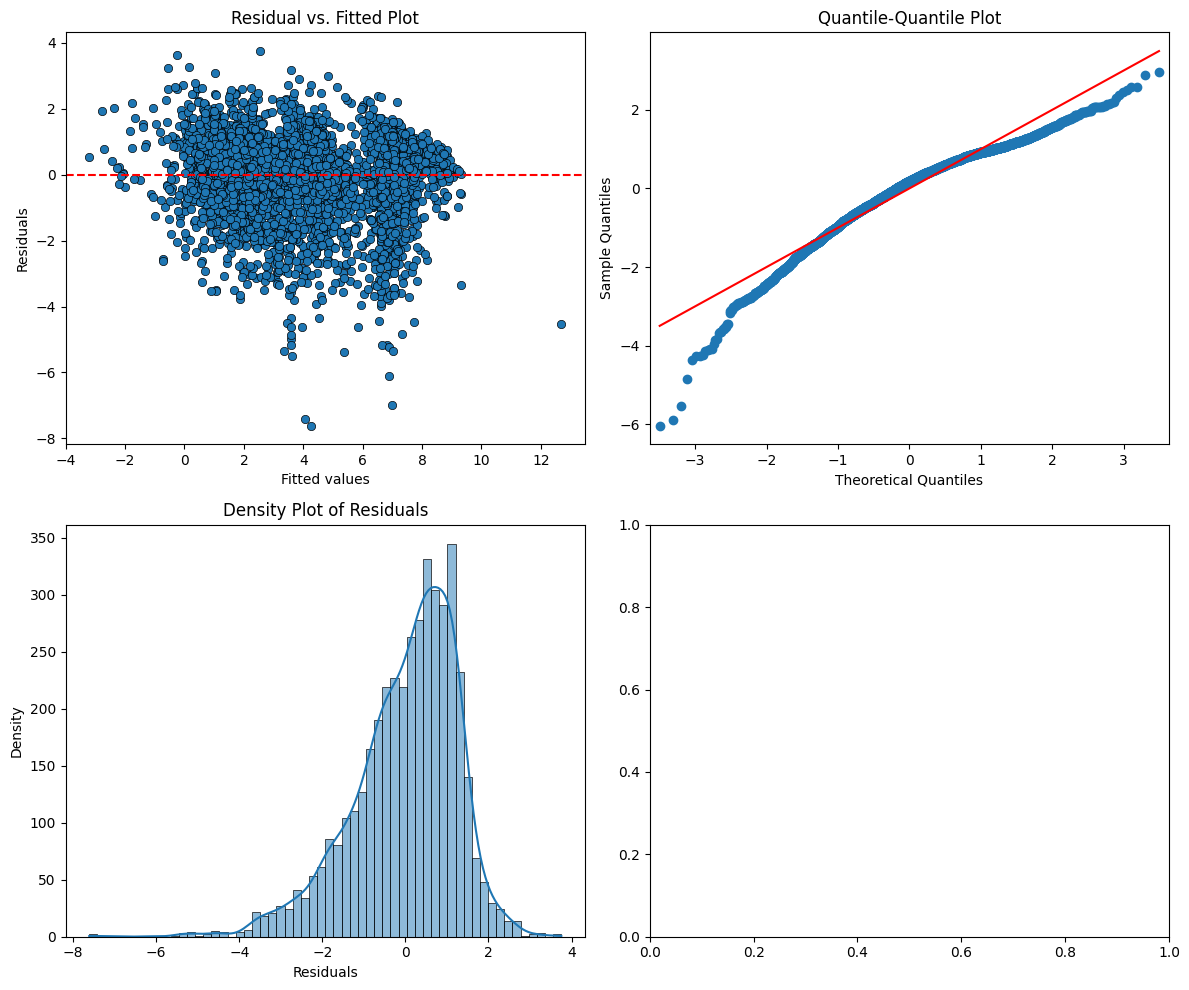

In [49]:
# Calculate residuals
residuals = linear_model.resid

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Residual vs. Fitted Plot
sns.scatterplot(x=linear_model.fittedvalues, y=residuals, edgecolor='k', ax=axes[0, 0])
axes[0, 0].axhline(0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Fitted values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residual vs. Fitted Plot')

# Q-Q Plot
sm.qqplot(residuals, line='s', fit=True, ax=axes[0, 1])
axes[0, 1].set_title('Quantile-Quantile Plot')

# Density Plot of Residuals
sns.histplot(residuals, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_title('Density Plot of Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

# Linear Regression with Lasso Feature Selection & Extraction

In [50]:
lasso_cv = LassoCV(alphas= np.logspace(-3,3, 11), cv = 5, random_state =5)
lasso_cv.fit(X_train_scaled, y_train)

best_alpha = lasso_cv.alpha_

lasso_model = Lasso(alpha = best_alpha)
lasso_model.fit(X_train_scaled, y_train)

cv_scores = cross_val_score(lasso_model, X_train_scaled, y_train, cv = 5, scoring = 'neg_mean_squared_error')
rmse_scores = (-scores)**.5

cv_predictions = cross_val_predict(lasso_model, X_train_scaled, y_train, cv=5)
cv_rmse = mean_squared_error(y_train, cv_predictions, squared = False)
print('Cross - Validation RMSE using Cross Val Pred', cv_rmse)

Cross - Validation RMSE using Cross Val Pred 1.370586097743058


In [51]:
lasso_model.fit(X_train_scaled, y_train)
y_pred = lasso_model.predict(X_test_scaled)

holdout_rmse = mean_squared_error(y_test, y_pred, squared = False)
print('Holdout RMSE: ', holdout_rmse)

Holdout RMSE:  1.9235320344365423


## Feature Importance Plot - Lasso

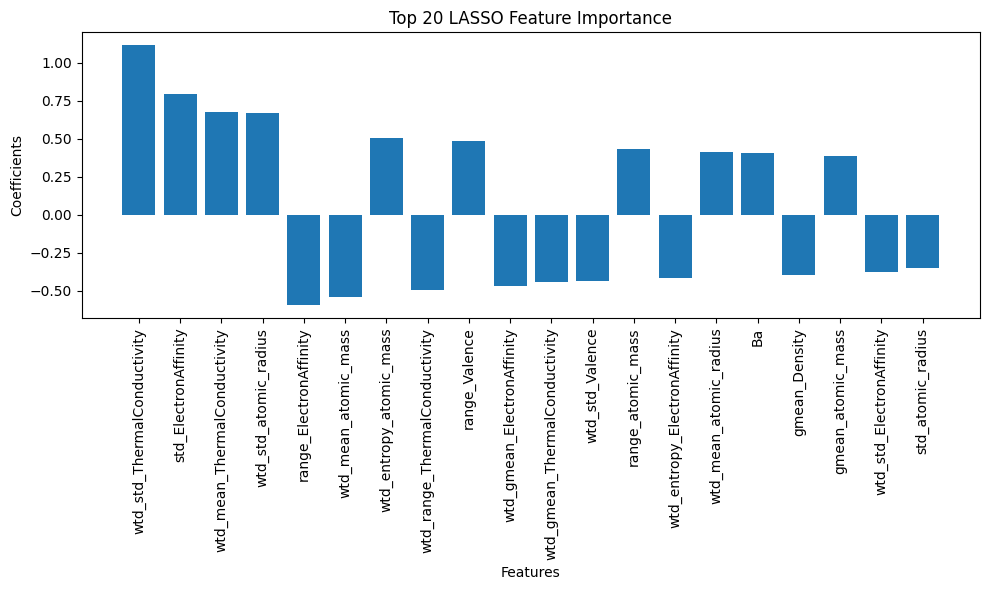

In [52]:
lasso_model.fit(X_train_scaled, y_train)

# Get the coefficients from the trained lasso model
lasso_coefficients = lasso_model.coef_

# Get indices of non-zero coefficients
non_zero_indices = np.where(lasso_coefficients != 0)[0]

# Get the non-zero coefficients
non_zero_coefficients = lasso_coefficients[non_zero_indices]

# Get the corresponding non-zero feature names
selected_features = feature_names[non_zero_indices]

# Get the corresponding feature names
feature_names = X_train.columns

# Sort the coefficients and feature names together based on absolute coefficient values
sorted_indices = abs(lasso_coefficients).argsort()[::-1]
top_indices = sorted_indices[:20]  # Select the top 20 feature indices
top_coefficients = lasso_coefficients[top_indices]
top_feature_names = feature_names[top_indices]

# Create a feature importance plot for the top 20 features
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_feature_names)), top_coefficients)
plt.xticks(range(len(top_feature_names)), top_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Top 20 LASSO Feature Importance')
plt.tight_layout()
plt.show()

## Linear Regression Model w/ Lasso Extracted Features

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy.special import inv_boxcox

X_train_selected = X_train_scaled[selected_features].reset_index(drop=True)
y_train_selected = y_train.reset_index(drop=True)

X_test_selected = X_test_scaled[selected_features].reset_index(drop=True)
y_test_selected = y_test.reset_index(drop=True)

# Add a constant term to the features
X_train_selected_with_const = sm.add_constant(X_train_selected)
X_test_selected_with_const = sm.add_constant(X_test_selected)

# Fit the OLS model
linear_model = sm.OLS(y_train_selected, X_train_selected_with_const).fit()

# Print the model summary
print(linear_model.summary())


                               OLS Regression Results                              
Dep. Variable:     critical_temp_transform   R-squared:                       0.800
Model:                                 OLS   Adj. R-squared:                  0.795
Method:                      Least Squares   F-statistic:                     144.1
Date:                     Wed, 30 Aug 2023   Prob (F-statistic):               0.00
Time:                             18:33:59   Log-Likelihood:                -7001.7
No. Observations:                     4252   AIC:                         1.424e+04
Df Residuals:                         4136   BIC:                         1.497e+04
Df Model:                              115                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

## Predictions & RMSE on Natural Scale

In [54]:
# Making predictions on the training set
y_train_pred_transformed = linear_model.predict(X_train_selected_with_const)
# Making predictions on the test set
y_test_pred_transformed = linear_model.predict(X_test_selected_with_const)

# Make predictions positive (won't work with negative predictions)
# there isn't alot so we proceeded and used very very small number
y_train_pred_transformed[y_train_pred_transformed <= 0] = 1e-9
y_test_pred_transformed[y_test_pred_transformed <= 0] = 1e-9

# Inverse transform the predictions
y_train_pred_original = inv_boxcox(y_train_pred_transformed, lambda_value)
y_test_pred_original = inv_boxcox(y_test_pred_transformed, lambda_value)

# Inverse transform y 
y_train_original = inv_boxcox(y_train_selected, lambda_value)
y_test_original = inv_boxcox(y_test_selected, lambda_value)

# Compute RMSE
lasso_linreg_original_train = np.sqrt(mean_squared_error(y_train_original, y_train_pred_original))
lasso_linreg_original = np.sqrt(mean_squared_error(y_test_original, y_test_pred_original))

print(f'Training RMSE (original scale): {lasso_linreg_original_train:.4f}')
print(f'Test RMSE (original scale): {lasso_linreg_original:.4f}')

Training RMSE (original scale): 16.3393
Test RMSE (original scale): 18.6762


## Residual Plot for Linear Regression w/ Lasso Extracted Features

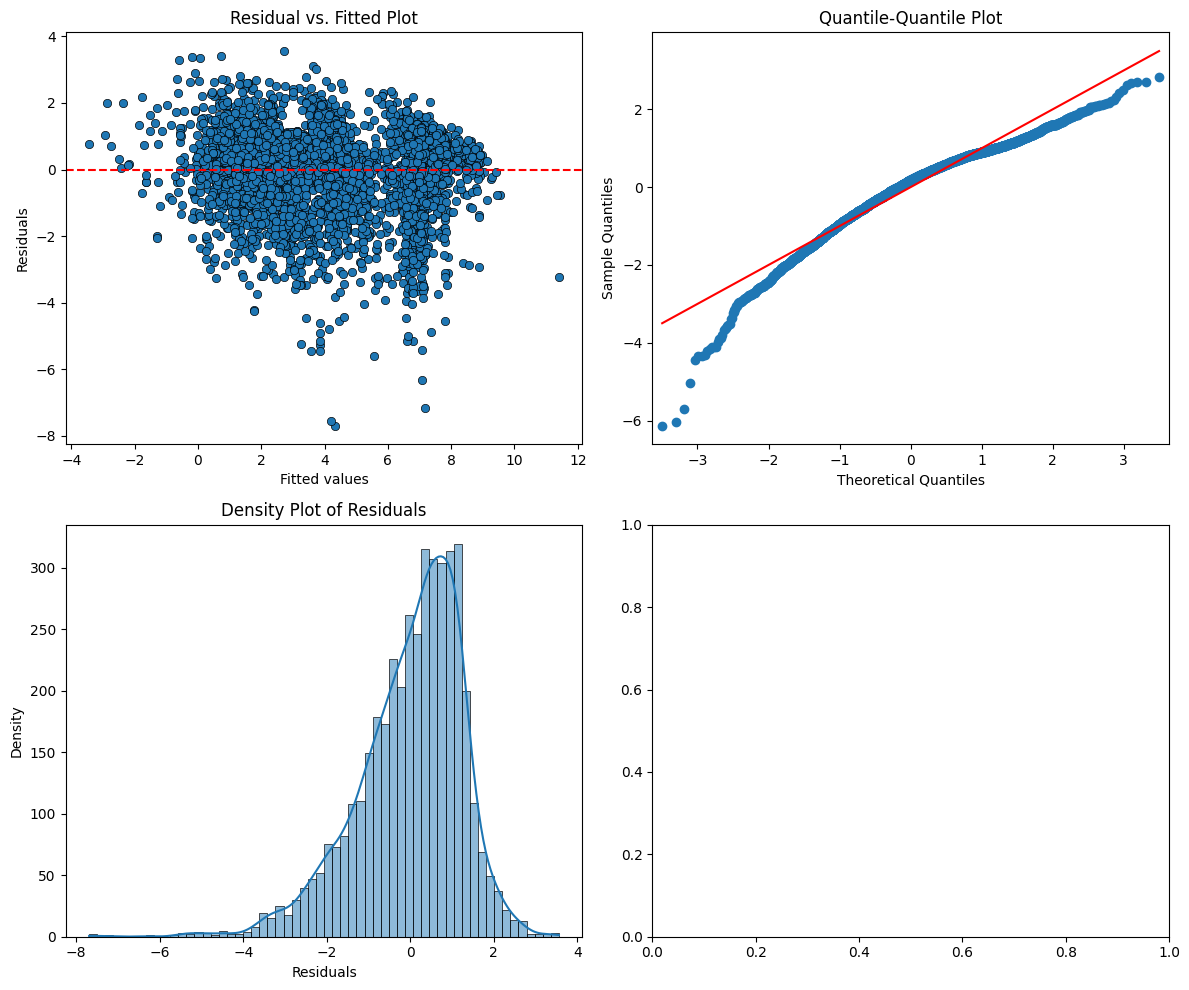

In [55]:
# Calculate residuals
residuals = linear_model.resid

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Residual vs. Fitted Plot
sns.scatterplot(x=linear_model.fittedvalues, y=residuals, edgecolor='k', ax=axes[0, 0])
axes[0, 0].axhline(0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Fitted values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residual vs. Fitted Plot')

# Q-Q Plot
sm.qqplot(residuals, line='s', fit=True, ax=axes[0, 1])
axes[0, 1].set_title('Quantile-Quantile Plot')

# Density Plot of Residuals
sns.histplot(residuals, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_title('Density Plot of Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

<hr>

# Model Scores

<hr>

In [56]:
# lasso 
print('Original Dataset Lasso')
print('RMSE: ', cv_lasso_rmse)
print('Original Dataset Lasso')
print('RMSE Holdout Set', holdout_rmse_lasso,'\n')

# ridge 
print('Original Dataset Ridge')
print('RMSE: ', cv_ridge_rmse)
print('Original Dataset Ridge')
print('RMSE Holdout Set', holdout_rmse_ridge,'\n' )

# Linear Regression with Elastic Net Feature Extraction Set
print('Elastic Net Linear Regression Model (Transformed Target)')
print('RMSE Validation Set: ', test_rmse_original, '\n')

# Linear Regression with Lasso Feature Extraction Set
print('Lasso Linear Regression Model (Transformed Target)')
print('RMSE Validation Set',lasso_linreg_original )

Original Dataset Lasso
RMSE:  17.615726908951025
Original Dataset Lasso
RMSE Holdout Set 23.508161878655947 

Original Dataset Ridge
RMSE:  17.50242622687606
Original Dataset Ridge
RMSE Holdout Set 24.77233804560577 

Elastic Net Linear Regression Model (Transformed Target)
RMSE Validation Set:  17.62381380038025 

Lasso Linear Regression Model (Transformed Target)
RMSE Validation Set 18.676224866028324
